# Библиотеки

In [ ]:
#pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.8 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=1ee1cc5adae6813cd1f37b0d1a6a13cb31e52a4fb90466850be4200f17216bc5
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling ch

In [4]:
pip install sklearn


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/1b/0f/77716aa9dd84bb1aa5e93c87122af1de89697b6231f6d01d58d4e7c03c14/yfinance-0.2.36-py2.py3-none-any.whl.metadata
  Using cached yfinance-0.2.36-py2.py3-none-any.whl.metadata (11 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Using cached frozendict-2.4.0-py3-none-any.whl
  Using cached peewee-3.17.0-py3-none-any.whl
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached yfinance-0.2.36-py2.py3-none-any.whl (72 kB)


In [2]:
#pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.4 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
import warnings
import datetime

In [2]:
from datetime import timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
#from sklearn.cluster import DBSCAN
#from sklearn.cluster import KMeans
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import combinations
from sklearn.linear_model import LinearRegression
#from pmdarima import auto_arima
#from statsmodels.tsa.arima.model import ARIMA
#from googletrans import Translator

# Data. Компании S&P500 за 2019-2021

In [4]:
def get_sp500_tickers():
    # Ссылка на страницу Wikipedia с перечнем компаний S&P 500
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

    # Скачивание таблицы с помощью pandas
    sp500_table = pd.read_html(url, header=0)[0]
    tickers = sp500_table['Symbol'].tolist()

    # Обработка символов, которые могут вызвать проблемы (например, замена '.' на '-')
    tickers = [ticker.replace('.', '-') for ticker in tickers]

    return tickers

# Получение списка тикеров
tickers = get_sp500_tickers()

end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=180)
data = yf.download(tickers, start=start_date, end=end_date)['Close']

data.head()

[*********************100%%**********************]  503 of 503 completed


Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-07-28,126.050003,16.790001,195.830002,150.850006,153.330002,112.730003,77.250000,315.549988,528.869995,198.419998,...,108.980003,62.889999,104.160004,41.029999,112.620003,136.940002,139.339996,299.179993,38.689999,189.899994
2023-07-31,121.769997,16.750000,196.449997,149.580002,152.190002,111.330002,77.690002,316.350006,546.169983,199.529999,...,108.980003,62.730000,107.239998,41.520000,112.750000,137.669998,138.149994,307.959991,38.250000,188.089996
2023-08-01,122.480003,16.230000,195.610001,148.539993,148.910004,110.529999,77.099998,320.970001,549.099976,199.479996,...,109.139999,62.849998,106.620003,41.369999,111.930000,136.360001,132.270004,254.770004,37.099998,185.509995
2023-08-02,127.709999,15.950000,192.580002,149.380005,144.559998,108.620003,77.360001,317.779999,530.299988,192.460007,...,105.160004,62.880001,105.290001,40.669998,112.080002,135.000000,128.380005,241.149994,36.630001,182.000000
2023-08-03,125.050003,15.980000,191.169998,149.050003,140.880005,107.540001,77.389999,317.130005,523.760010,191.490005,...,105.610001,61.320000,107.120003,39.279999,108.400002,135.619995,125.790001,249.550003,37.410000,180.880005


In [7]:
tickers.sort()
num_tickers = len(tickers)
num_tickers

503

In [8]:
# Удаляем столбцы, где более 10% данных отсутствуют
threshold = 0.1  # 10% порог
data = data.dropna(thresh=int((1 - threshold) * len(data)), axis=1)

# Заполнение оставшихся пропусков, например, методом ffill (forward fill)
data = data.ffill()

# Удаляем строки, которые все еще содержат NaN (если они есть)
data = data.dropna()

In [9]:
pairs = list(combinations(data.columns, 2))
pairs[:10]

[('A', 'AAL'),
 ('A', 'AAPL'),
 ('A', 'ABBV'),
 ('A', 'ABNB'),
 ('A', 'ABT'),
 ('A', 'ACGL'),
 ('A', 'ACN'),
 ('A', 'ADBE'),
 ('A', 'ADI'),
 ('A', 'ADM')]

In [8]:
len(pairs)

126253

In [11]:
# Результаты теста CADF для каждой пары
cadf_results = []

for pair in pairs:
    stock1 = data[pair[0]]
    stock2 = data[pair[1]]

    # Рассчитываем коинтеграцию с помощью CADF теста
    score, p_value, _ = ts.coint(stock1, stock2)

    # Сохраняем результаты
    cadf_results.append((pair, score, p_value))

# Анализ результатов
# Создаем DataFrame из результатов
cadf_df = pd.DataFrame(cadf_results, columns=["Pair", "Test Statistic", "P-Value"])

# Сортировка результатов по p-value в порядке возрастания (чем меньше p-value, тем сильнее коинтеграция)
cadf_df_sorted = cadf_df.sort_values(by="P-Value")
# Сортировка результатов по p-значению
#cadf_results.sort(key=lambda x: x[3])

# Вывод первых 10 результатов для просмотра
cadf_df_sorted[:10]

,Pair,Test Statistic,P-Value
83421,"(GPN, PFG)",-6.587014,7.954032e-08
94600,"(ITW, WAT)",-6.491032,1.319252e-07
12615,"(AMAT, SPGI)",-6.442834,1.697855e-07
95632,"(JCI, KVUE)",-6.429590,1.819350e-07
46670,"(CMI, SWKS)",-6.383105,2.317124e-07
12674,"(AMAT, WAB)",-6.311535,3.354843e-07
12265,"(AMAT, BLK)",-6.161819,7.208627e-07
12350,"(AMAT, ECL)",-6.157969,7.350589e-07
82094,"(GNRC, GPN)",-6.114193,9.169368e-07
95858,"(JCI, ZBRA)",-6.107114,9.502128e-07


In [21]:
q = cadf_df_sorted.sort_values(by="Test Statistic")
q[:50]

,Pair,Test Statistic,P-Value
83421,"(GPN, PFG)",-6.587014,7.954032e-08
94600,"(ITW, WAT)",-6.491032,1.319252e-07
12615,"(AMAT, SPGI)",-6.442834,1.697855e-07
95632,"(JCI, KVUE)",-6.429590,1.819350e-07
46670,"(CMI, SWKS)",-6.383105,2.317124e-07
12674,"(AMAT, WAB)",-6.311535,3.354843e-07
12265,"(AMAT, BLK)",-6.161819,7.208627e-07
12350,"(AMAT, ECL)",-6.157969,7.350589e-07
82094,"(GNRC, GPN)",-6.114193,9.169368e-07
95858,"(JCI, ZBRA)",-6.107114,9.502128e-07


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Акции в пятерочке/yfinance_data_2019-2021.csv')

data.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,Adj Close
0,18,2019-01-02,133.037946,135.202108,132.415518,134.627548,2059300.0,0.0,0.0,ACN,NaN
1,19,2019-01-03,133.229489,133.650831,129.830042,130.031128,2801300.0,0.0,0.0,ACN,NaN
2,20,2019-01-04,132.262302,135.345743,131.668601,135.087204,2296400.0,0.0,0.0,ACN,NaN
3,21,2019-01-07,134.857375,136.332057,133.918941,135.556412,2315600.0,0.0,0.0,ACN,NaN
4,22,2019-01-08,138.496253,140.583793,136.638526,138.984619,2647800.0,0.0,0.0,ACN,NaN


In [ ]:
# Получение уникальных тикеров акций
unique_tickers = data['Ticker'].unique()
unique_tickers.sort()
num_tickers = len(unique_tickers)
num_tickers

497

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

# Расчет матриц корреляции

In [ ]:
# Матрица по дневным доходам
# Расчет дневных доходов для каждой акции
data['Daily Return'] = data.groupby('Ticker')['Close'].pct_change()

# Переструктурирование данных для корреляционного анализа
data_dr = data.pivot_table(index='Date', columns='Ticker', values='Daily Return')

data_dr.head()

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-03,-0.036840,-0.074507,-0.099607,-0.032949,NaN,-0.047194,-0.015655,-0.034142,-0.039498,-0.060405,...,-0.009674,-0.003940,-0.015354,0.000528,-0.034281,-0.025153,-0.018087,-0.059908,-0.005532,-0.034565
2019-01-04,0.034614,0.065868,0.042689,0.032217,NaN,0.028541,0.023662,0.038884,0.048632,0.024278,...,0.040333,0.009786,0.036870,0.029016,0.042192,0.026026,0.034153,0.041462,0.030713,0.039235
2019-01-07,0.021234,0.028402,-0.002226,0.014595,NaN,0.014976,-0.002274,0.003473,0.013573,0.006288,...,0.017758,-0.004330,0.005200,0.017944,-0.014789,-0.001093,0.000385,0.015166,0.003989,0.006017
2019-01-08,0.014660,-0.016085,0.019063,0.004648,NaN,-0.012007,0.003798,0.025290,0.014918,0.024396,...,0.031333,0.011596,0.007271,-0.006799,0.009401,-0.001970,-0.022426,0.006697,0.009114,0.014894
2019-01-09,0.020935,0.030845,0.016982,-0.032823,NaN,0.016691,0.012864,0.005029,0.011819,0.025340,...,0.013020,-0.007983,0.005275,0.005325,0.016224,-0.000439,0.008172,0.024819,0.008569,-0.003582


In [ ]:
# Расчет корреляционной матрицы по дневным доходам
corr_matrix_dr = data_dr.corr()
corr_matrix_dr.head()

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Ticker,,,,,,,,,,,,,,,,,,,,,
A,1.000000,0.283961,0.573792,0.463007,0.196704,0.632059,0.531231,0.631497,0.593475,0.604274,...,0.368047,0.445053,0.407251,0.417722,0.586225,0.415632,0.449115,0.588483,0.383339,0.633460
AAL,0.283961,1.000000,0.242935,0.183230,0.269141,0.151749,0.434581,0.315790,0.137242,0.316802,...,0.554338,0.114208,0.499282,0.361823,0.446099,0.397647,0.443677,0.297034,0.521667,0.200029
AAPL,0.573792,0.242935,1.000000,0.416704,0.224843,0.524613,0.426740,0.600923,0.686363,0.607590,...,0.370513,0.425882,0.361761,0.312805,0.493202,0.422227,0.371794,0.548271,0.264751,0.580150
ABBV,0.463007,0.183230,0.416704,1.000000,0.005228,0.481697,0.422887,0.484124,0.408380,0.382523,...,0.289930,0.355668,0.388935,0.397437,0.379490,0.352067,0.382399,0.379604,0.302358,0.474308
ABNB,0.196704,0.269141,0.224843,0.005228,1.000000,-0.033260,0.041333,0.071581,0.248706,0.265345,...,0.274707,-0.211666,0.128567,0.039187,0.190111,0.097847,0.140519,0.189794,0.118515,0.016449


In [ ]:
# # Матрица по ценам закрытия
# Преобразование данных так, чтобы для каждого тикера была отдельная колонка с ценами закрытия
data_close = data.pivot_table(index='Date', columns='Ticker', values='Close')

data_close.head()

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,64.262276,31.963160,38.439735,74.481514,NaN,66.047531,26.190001,134.627548,224.570007,81.788750,...,100.250526,45.101440,57.382545,37.147251,63.995132,86.384338,97.101669,156.240005,38.495026,82.876381
2019-01-03,61.894875,29.581665,34.610851,72.027458,NaN,62.930470,25.780001,130.031128,215.699997,76.848297,...,99.280663,44.923729,56.501511,37.166851,61.801342,84.211502,95.345345,146.880005,38.282089,80.011795
2019-01-04,64.037277,31.530161,36.088364,74.347969,NaN,64.726593,26.389999,135.087204,226.190002,78.714058,...,103.284927,45.363331,58.584705,38.245289,64.408859,86.403221,98.601692,152.970001,39.457855,83.151047
2019-01-07,65.397072,32.425678,36.008041,75.433090,NaN,65.695915,26.330000,135.556412,229.259995,79.209045,...,105.119019,45.166916,58.889362,38.931568,63.456306,86.308769,98.639656,155.289993,39.615250,83.651375
2019-01-08,66.355766,31.904110,36.694466,75.783684,NaN,64.907135,26.430000,138.984619,232.679993,81.141441,...,108.412689,45.690693,59.317535,38.666859,64.052849,86.138718,96.427612,156.330002,39.976315,84.897263


In [ ]:
# Расчет корреляционной матрицы по ценам закрытия
corr_matrix_close = data_close.corr()
corr_matrix_close.head()

Ticker,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Ticker,,,,,,,,,,,,,,,,,,,,,
A,1.000000,-0.346144,0.937312,0.929293,-0.148647,0.935624,0.380607,0.958980,0.948484,0.962368,...,-0.113726,0.633384,0.023452,0.587954,0.956792,0.766903,0.599576,0.978618,0.709805,0.930031
AAL,-0.346144,1.000000,-0.566083,-0.442587,-0.031997,-0.498070,0.360661,-0.345701,-0.542991,-0.273294,...,0.764219,-0.616933,0.854186,0.260533,-0.148835,0.126322,-0.099840,-0.298510,0.326136,-0.503539
AAPL,0.937312,-0.566083,1.000000,0.941720,0.022169,0.971614,0.286469,0.936709,0.967414,0.914415,...,-0.249825,0.766536,-0.231944,0.463587,0.854077,0.634840,0.609054,0.923422,0.527755,0.958678
ABBV,0.929293,-0.442587,0.941720,1.000000,-0.215939,0.913881,0.311548,0.914739,0.906859,0.911763,...,-0.119508,0.657477,-0.083472,0.520982,0.848181,0.632244,0.593074,0.938181,0.633641,0.900073
ABNB,-0.148647,-0.031997,0.022169,-0.215939,1.000000,0.347529,-0.082146,-0.005737,-0.134857,0.107813,...,0.023302,-0.628942,0.047782,-0.376362,-0.258501,-0.250243,-0.126454,0.018924,0.230350,-0.124077


# Кластеризация по корреляции в матрицах

In [ ]:
# Кластеризация DBSCAN по дневному доходу

In [ ]:
# Начальные параметры: eps=0.5 (сильная положительная корреляция), min_samples=2 (минимальный размер кластера)
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(corr_matrix_dr)

# Сохранение результатов в DataFrame
dbscan_clusters = pd.DataFrame({'Ticker': corr_matrix_dr.index, 'DBSCAN_Cluster': dbscan_labels})

# Группировка акций по кластерам DBSCAN
dbscan_clustered_tickers = dbscan_clusters.groupby('DBSCAN_Cluster')['Ticker'].apply(list)

# Вывод списка акций в каждом кластере DBSCAN
dbscan_clustered_tickers

DBSCAN_Cluster
-1     [A, AAL, AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADB...
 0                                          [AMAT, LRCX]
 1                                       [BAC, JPM, PNC]
 2                                          [CDNS, SNPS]
 3                                  [CFG, FITB, KEY, RF]
 4                                       [COF, DFS, SYF]
 5                                            [CPT, MAA]
 6                                            [CSX, NSC]
 7                                       [EQR, ESS, UDR]
 8                                            [FRT, REG]
 9                                         [GOOG, GOOGL]
 10                                           [MET, PRU]
 11                                          [NWS, NWSA]
 12                                           [PSX, VLO]
Name: Ticker, dtype: object

In [ ]:
# Кластеризация DBSCAN по ценам закрытия

In [ ]:
# Начальные параметры: eps=0.5 (сильная положительная корреляция), min_samples=2 (минимальный размер кластера)
dbscan = DBSCAN(eps=0.5, min_samples=2)
labels_close = dbscan.fit_predict(corr_matrix_close)

# Сохранение результатов в DataFrame
dbscan_clusters_close = pd.DataFrame({'Ticker': corr_matrix_close.index, 'DBSCAN_Cluster': labels_close})

# Группировка акций по кластерам DBSCAN
dbscan_clustered_tickers_close = dbscan_clusters_close.groupby('DBSCAN_Cluster')['Ticker'].apply(list)

# Вывод списка акций в каждом кластере DBSCAN
dbscan_clustered_tickers_close

DBSCAN_Cluster
-1     [AAL, AAPL, ABBV, ABNB, ACGL, ADM, ADP, ADSK, ...
 0           [A, CRL, EPAM, GNRC, ISRG, MTD, NDAQ, TECH]
 1                                           [ABT, CTLT]
 2                                            [ACN, AJG]
 3                                           [ADBE, BIO]
 4                           [ADI, AMAT, EL, NXPI, ZBRA]
 5                                            [AME, IEX]
 6                                            [AMP, TEL]
 7                                       [BA, NCLH, UAL]
 8                                           [CBRE, RJF]
 9                    [CDNS, CMG, MPWR, MSFT, SNPS, TMO]
 10                                           [CFG, MGM]
 11                                     [CPRT, SHW, STE]
 12                                           [DFS, SYF]
 13                                            [DGX, HD]
 14                                      [DHI, LEN, TXN]
 15                              [DHR, MSCI, ODFL, POOL]
 16             

In [ ]:
# Кластеризация с помощью K-средних (K-means clustering)
# Определение количесства кластеров методом локтя (Elbow Method)

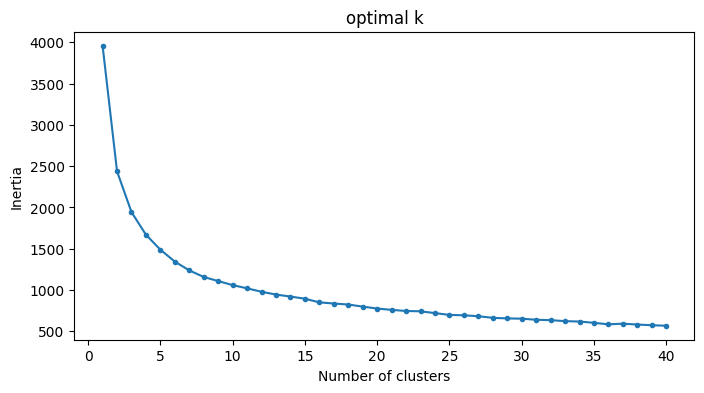

In [ ]:
# Определение оптимального количества кластеров с помощью метода локтя
inertia = []
k_range = range(1, 41)  # Проверяем количество кластеров от 1 до 40

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=10)
    kmeans.fit(corr_matrix_dr)
    inertia.append(kmeans.inertia_)

# График
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='.')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('optimal k')
plt.show()

In [ ]:
# Выполним кластеризацию с 35 кластерами
kmeanss = KMeans(n_clusters=35, random_state=2, n_init=50)
kmeanss.fit(corr_matrix_dr)

# Получим метки кластеров для каждого тикера
kmeans_labels = kmeanss.labels_

# Сохраним результаты в DataFrame
kmeans_clusters = pd.DataFrame({'Ticker': corr_matrix_dr.index, 'Cluster': kmeans_labels})

kmeans_clusters.sort_values('Cluster')

# Группировка акций по кластерам
kmeans_clusters = kmeans_clusters.groupby('Cluster')['Ticker'].apply(list)
kmeans_clusters

Cluster
0     [AFL, AIG, AXP, BAC, C, CE, CFG, COF, CVX, DFS...
1     [ANET, CDAY, CHTR, CRM, CSGP, CTLT, FTNT, GNRC...
2     [APD, AVY, CSCO, EXPD, FAST, GRMN, GWW, IBM, J...
3     [AES, APTV, BA, BKNG, DIS, DRI, FLT, FMC, HCA,...
4     [AKAM, BDX, BIO, DG, EBAY, GILD, LLY, MKTX, TG...
5                     [CAG, CHD, CPB, GIS, HRL, K, SJM]
6     [ACGL, AIZ, ALL, ALLE, CB, CINF, EG, GD, MDT, ...
7     [ARE, DUK, ETR, EVRG, EXC, INVH, KO, MDLZ, NI,...
8     [AAPL, ADBE, ADSK, ANSS, CDNS, CRL, EPAM, FICO...
9     [APA, DVN, EOG, FANG, HES, MOS, MRO, OXY, PXD,...
10             [DLR, ED, EXR, KMB, MKC, PSA, SBAC, WEC]
11                                         [ABNB, MRNA]
12    [AMZN, DXCM, EA, ETSY, INCY, NFLX, PODD, REGN,...
13    [BXP, FRT, HIG, KIM, LW, REG, SPG, SYY, VTR, W...
14    [ADM, BEN, BK, CAT, CBRE, CMI, DD, DE, DOW, EM...
15                                    [CARR, CTRA, EQT]
16    [AMGN, BALL, BAX, BMY, JKHY, JNJ, MRK, NOC, OR...
17    [AMD, AXON, CMG, ENPH, FSLR, ILMN,

# Коинтеграция. Проверка всех возможных пар на коинтеграцию (2ч. в vscode)

In [ ]:
# Cointegrated Augmented Dickey-Fuller (CADF) Test

In [ ]:
# Инициализация списка для хранения результатов теста CADF
cadf_results = []

# Проведение теста CADF для каждой пары акций
for i in range(num_tickers):
    for j in range(i+1, num_tickers):
        ticker1 = unique_tickers[i]
        ticker2 = unique_tickers[j]

        # Выбор временных рядов для пары акций
        series1 = data_close[ticker1]
        series2 = data_close[ticker2]

        # Удаление NaN значений из временных рядов
        combined = pd.concat([series1, series2], axis=1).dropna()

        if not combined.empty:
            score, p_value, _ = coint(combined[ticker1], combined[ticker2])
            cadf_results.append((ticker1, ticker2, score, p_value))

# Сортировка результатов по p-значению
cadf_results.sort(key=lambda x: x[3])

# Вывод первых 10 результатов для просмотра
cadf_results[:10]

# Графики. Визуализация получившихся пар

In [ ]:
# График парных акций
def plot_tickers(tickers):
    data_close_selected = data_close[tickers]
    plt.figure(figsize=(8, 4))
    for ticker in tickers:
        plt.plot(data_close_selected.index, data_close_selected[ticker], label=ticker)

    plt.xlabel('Date')
    plt.ylabel('USD')
    plt.legend()
    plt.tight_layout()

    plt.show()

In [ ]:
# Информация по тикеру
def ticker_info(ticker):

    ticker_obj = yf.Ticker(ticker)

    # Получаем информацию о компании
    info = ticker_obj.info

    # Фильтруем название и описание
    company_name = info.get('longName')
    company_description = info.get('longBusinessSummary')

    # Создаем переводчик
    translator = Translator()

    # Переводим описание на русский язык
    try:
        translated_description = translator.translate(company_description, src='en', dest='ru').text
    except Exception as e:
        # В случае ошибки перевода, возвращаем описание на английском
        translated_description = company_description
        print(f"Ошибка перевода: {e}")

    return company_name, translated_description

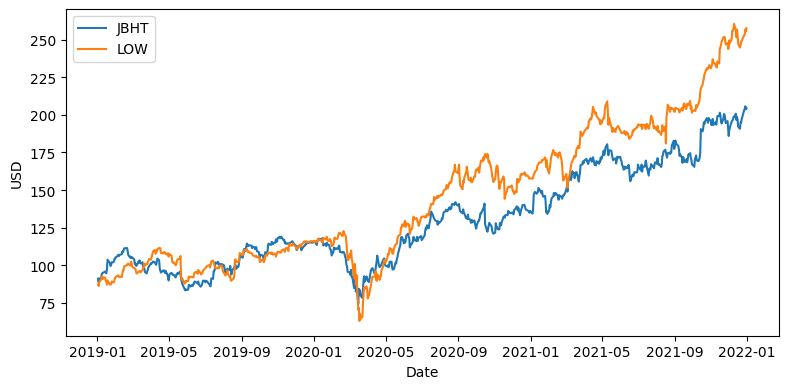

In [ ]:
plot_tickers(['JBHT', 'LOW'])

In [ ]:
ticker_info('JBHT')

('J.B. Hunt Transport Services, Inc.',
 'J.B. Hunt Transport Services, Inc. предоставляет поверхностную транспортировку, доставку и логистические услуги в Северной Америке.Он работает через пять сегментов: интермодальные (JBI), выделенные контрактные услуги (DCS), комплексные решения (ICS), службы окончательной мили (FMS) и грузовик (JBT).Сегмент JBI предлагает интермодальные грузовые решения.Он управляет 115 1550 кусками, принадлежащим компании, а также терпимового оборудования;владеет и поддерживает свой шасси из 95 553 единиц;и управляет парком из 6 081 принадлежащих компании тракторов, 615 независимых грузовиков-подрядчиков и 7 972 гонщиками компании.Сегмент DCS разрабатывает, разрабатывает и выполняет решения цепочки поставок, которые поддерживают различные транспортные сети.По состоянию на 31 декабря 2022 года он управлял 12 328 грузовиками, принадлежащими компании, 570 грузовиков, принадлежащих клиентам и 1 грузовикам-подрядчикам.Компания также управляет 23 354 принадлежащими пр

In [ ]:
ticker_info('LOW')

Ошибка перевода: The read operation timed out


("Lowe's Companies, Inc.",
 "Lowe's Companies, Inc., together with its subsidiaries, operates as a home improvement retailer in the United States. The company offers a line of products for construction, maintenance, repair, remodeling, and decorating. It also provides home improvement products, such as appliances, seasonal and outdoor living, lawn and garden, lumber, kitchens and bath, tools, paint, millwork, hardware, flooring, rough plumbing, building materials, décor, and electrical. In addition, the company offers installation services through independent contractors in various product categories; and extended protection plans and repair services. It sells its national brand-name merchandise and private brand products to professional customers, homeowners, and renters. The company also sells its products through Lowes.com website; and through mobile applications. Lowe's Companies, Inc. was founded in 1921 and is based in Mooresville, North Carolina.")

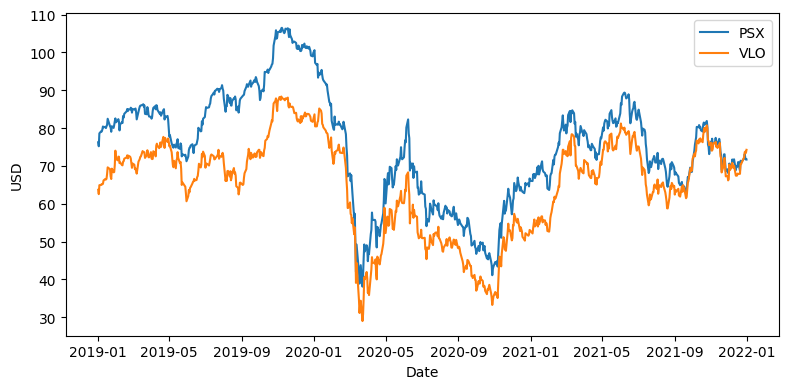

In [ ]:
plot_tickers(['PSX', 'VLO', 'CFG', 'FITB'])

In [ ]:
ticker_info('PSX')

('Phillips 66',
 'Phillips 66 работает как энергетическая компания по производству и логистике в Соединенных Штатах, Великобритании, Германии и на международном уровне.Он работает в течение четырех сегментов: средние течения, химические вещества, переработка, маркетинг и специальности (M & S).Средний сегмент транспортирует сырую нефть и другие сырья;доставляет рафинированные нефтяные продукты на рынок;предоставляет услуги по завершению и хранению для сырой нефти и рафинированной нефтяной продукции;транспорты, магазины, фракционисты, экспорт и рынки жидкостей природного газа;предоставляет другие платежные услуги по обработке;и собирает, процессы, транспорты и рынки природного газа.Сегмент химических веществ производит и продает этилен и другие продукты олефина;Продукты ароматических и стировых, такие как бензол, циклогексан, стирол и полистирол;и различные специальные химические продукты, в том числе органосульфарные химические вещества, растворители, катализаторы и химические вещества,

In [ ]:
ticker_info('VLO')

('Valero Energy Corporation',
 'Valero Energy Corporation производит, рынки и продает транспортное топливо и нефтехимические продукты в Соединенных Штатах, Канаде, Великобритании, Ирландии, Латинской Америке и на международном уровне.Он работает в течение трех сегментов: переработка, возобновляемое дизельное топливо и этанол.Компания производит калифорнийскую переформулированную бензиновую бендок для смешивания кислорода и обычного смеси для кислорода, смешивающего бензины, углеводный дизель, дизельное топливо, реактивное топливо и асфальт;ароматика;и серная сырая масла.Он продает свои изысканные продукты через оптовые стойки и объемные рынки;и примерно через розетки под брендами Valero, Beacon, Diamond Shamrock, Shamrock, Ultramar и Texaco.Компания также производит и продает этанол, сухие зерна дистиллятора, сироп и несъедобное кукурузное масло, прежде всего, для клиентов кормления животных.Кроме того, он владеет и управляет нефтью и рафинированными трубопроводами нефтяной продукции, 

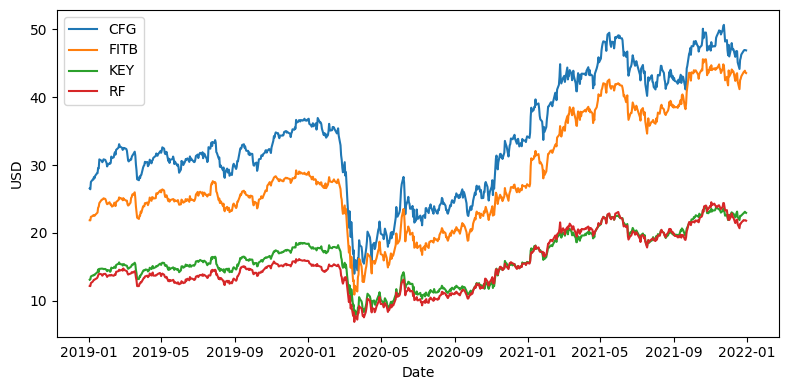

In [ ]:
plot_tickers(['CFG', 'FITB', 'KEY', 'RF'])

In [ ]:
ticker_info('RF')

('Regions Financial Corporation',
 'Financial Corporation Financial Corporation, финансовая холдинга, предоставляет банковские и банковские услуги индивидуальным и корпоративным клиентам.Он работает в течение трех сегментов: корпоративного банка, потребительского банка и управления активами.Сегмент корпоративного банка предлагает коммерческие банковские услуги, такие как коммерческая и промышленная, коммерческая недвижимость и кредитование недвижимости инвесторов;финансирование аренды оборудования;депозитный продукт;и ценные бумаги андеррайтинг и размещение, синдикация и размещение кредитования, валютная валюта, деривативы, слияние и приобретение, а также другие консультативные услуги.Он обслуживает корпоративные, средние рынки и коммерческие застройщики и инвесторы.Сегмент потребительского банка предоставляет потребительские банковские продукты и услуги, связанные с первой ипотекой жилой, линии и кредитами на дому и кредитами, потребительские кредитные карты и другие потребительские к

In [ ]:
ticker_info('KEY')

('KeyCorp',
 'KeyCorp работает в качестве холдинговой компании Национальной ассоциации Keybank, которая предоставляет различные розничные и коммерческие банковские продукты и услуги в Соединенных Штатах.Он работает в двух сегментах, потребительском банке и коммерческом банке.Компания предлагает различные депозиты, инвестиционные продукты и услуги;и личные финансы и финансовое благополучие, рефинансирование студенческих кредитов, ипотечное и домашнее капитал, кредитование, кредитные карты, казначейство, консультации по бизнесу, управление активами, управление активами, инвестиции, управление денежными средствами, управление портфелем, а также доверие и связанные с ним услуги для отдельных лиц и небольших и небольшихСредний бизнес.Он также предоставляет набор продуктов банковского и рынка капитала, таких как синдицированные финансы, долг и акционерный рынок капитала, коммерческие платежи, финансирование оборудования, коммерческое ипотечное банковское дело, деривативы, валютные, финансовы

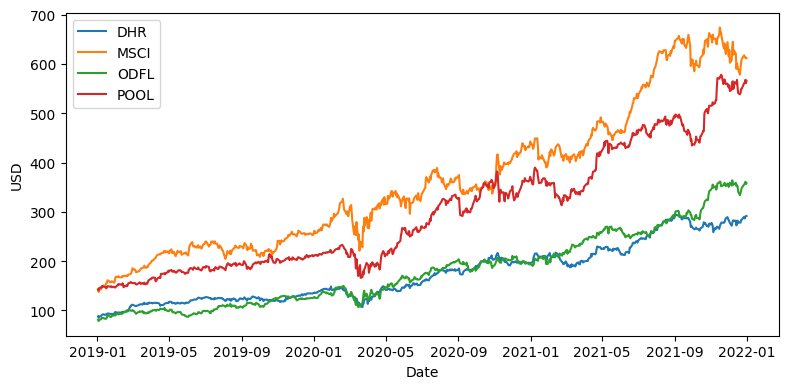

In [ ]:
plot_tickers(['DHR', 'MSCI', 'ODFL', 'POOL'])

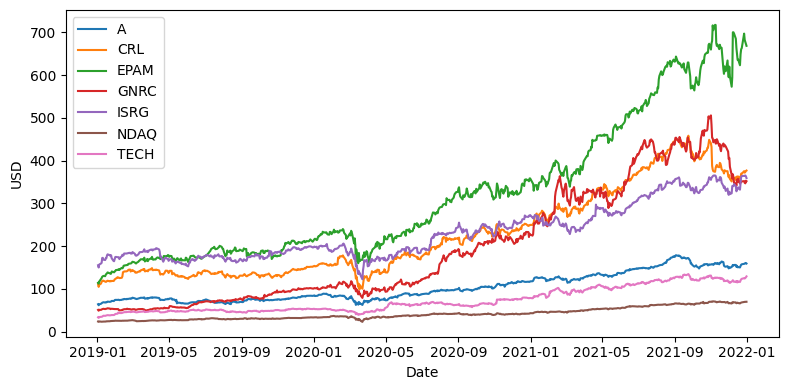

In [ ]:
plot_tickers(['A', 'CRL', 'EPAM', 'GNRC', 'ISRG', 'NDAQ', 'TECH'])

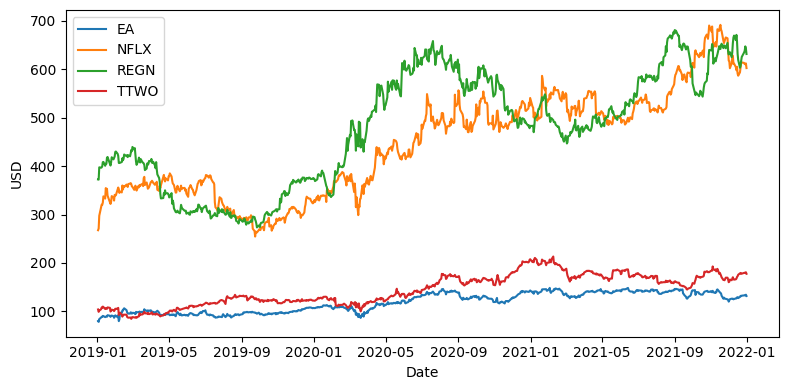

In [ ]:
plot_tickers( ['EA', 'NFLX', 'REGN', 'TTWO'])

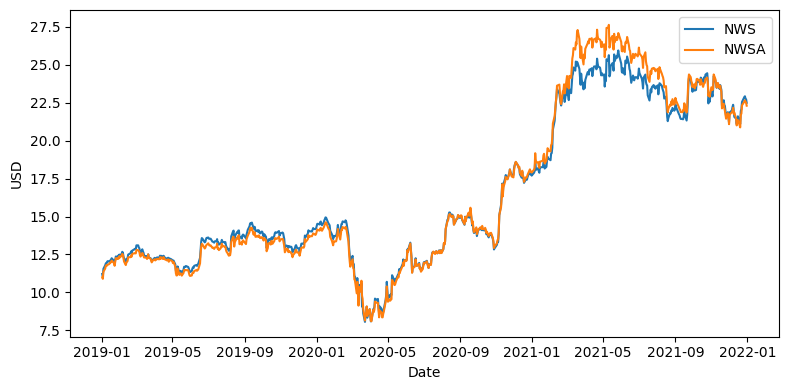

In [ ]:

plot_tickers(['NWS', 'NWSA'])

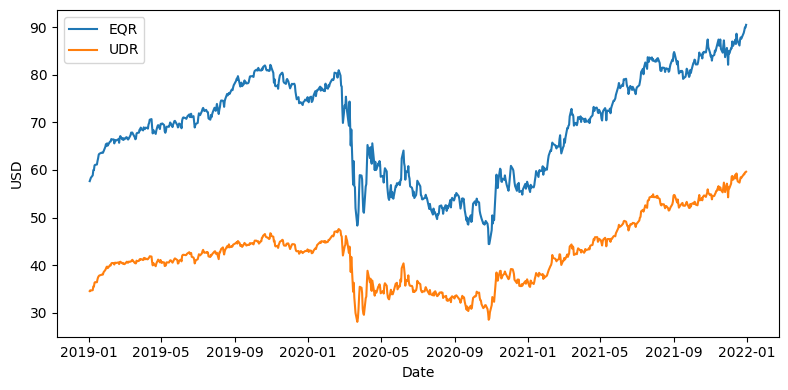

In [ ]:
plot_tickers(['EQR', 'UDR'])

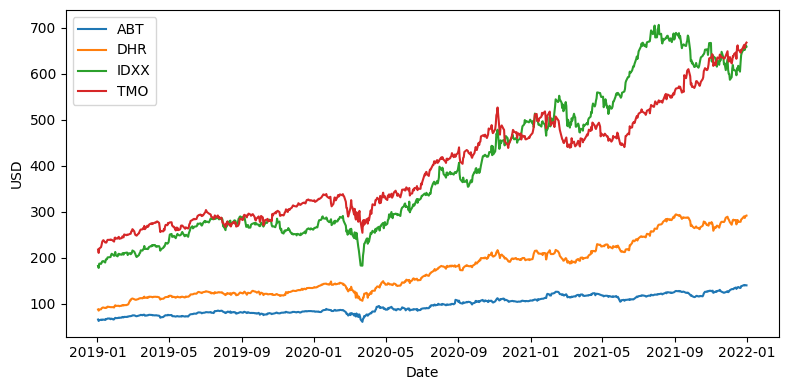

In [ ]:
plot_tickers(['ABT', 'DHR', 'IDXX', 'TMO'])

# Стратегия z-счет. Вход в позицию при расширенном или суженном спреде, например на 2 стандартных отклонения (z-счет). Выход при возвращении к типчному спреду.

In [ ]:
#Проверка данных на стационарность и корреляцию
# Тестируемые тикеры акций
name_1 = 'JBHT'
name_2 = 'LOW'

# Период для загрузки данных
start_date = "2022-01-02"
end_date = "2022-12-31"

# Загружаем дневные данные из Yahoo finance
ticker1 = yf.download(name_1, start=start_date, end=end_date)
ticker2 = yf.download(name_2, start=start_date, end=end_date)

# Внутредневные котировки
# inday_1 = yf.download(tickers=name_1, period="5d", interval="5m")
# inday_2 = yf.download(tickers=name_2, period="5d", interval="5m")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Close_1,Close_2,Log_1,Log_2,Spread
Date,,,,,
2022-01-03,201.839996,255.509995,5.307475,5.543262,-0.235786
2022-01-04,207.660004,259.809998,5.335902,5.559951,-0.224048
2022-01-05,203.360001,254.750000,5.314978,5.540283,-0.225305
2022-01-06,201.949997,257.790009,5.308020,5.552145,-0.244125
2022-01-07,200.110001,251.089996,5.298867,5.525811,-0.226944


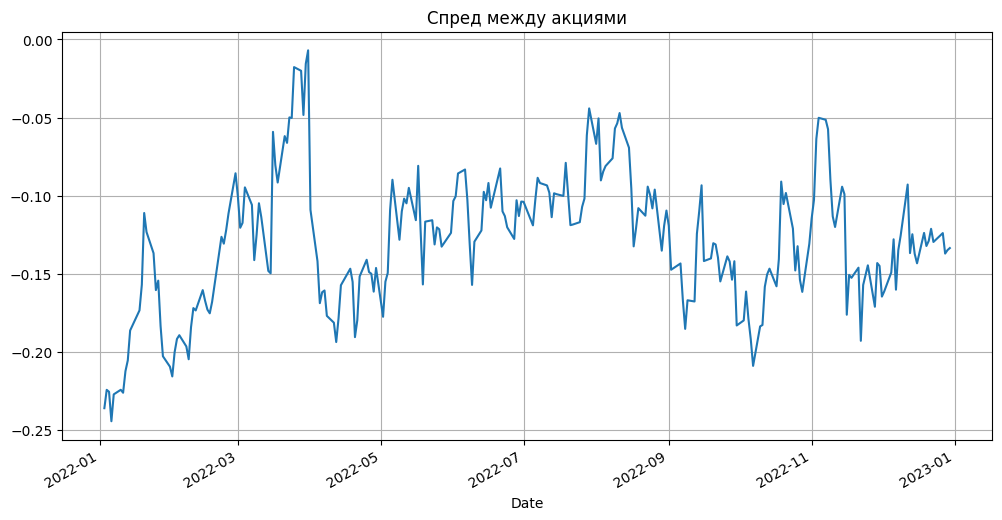

In [ ]:
# Объединение данных по дате
merged_data = pd.merge(ticker1['Close'], ticker2['Close'], left_index=True, right_index=True, how='inner')
merged_data.columns = ['Close_1', 'Close_2']

# Расчет спреда
# Расчет логарифмических цен
merged_data['Log_1'] = np.log(merged_data['Close_1'])
merged_data['Log_2'] = np.log(merged_data['Close_2'])

# Расчет спреда как разницы логарифмических цен
merged_data['Spread'] = merged_data['Log_1'] - merged_data['Log_2']


# Визуализация спреда
merged_data['Spread'].plot(title='Спред между акциями', figsize=(12, 6), grid=True)

merged_data.head()

In [ ]:
print(merged_data.index.dtype)

datetime64[ns]


In [ ]:
# Расчет дневных доходностей для каждой акции
merged_data['Returns_1'] = merged_data['Close_1'].pct_change()* 100
merged_data['Returns_2'] = merged_data['Close_2'].pct_change()* 100

merged_data = merged_data.dropna()

merged_data.head()

,Close_1,Close_2,Log_1,Log_2,Spread,Returns_1,Returns_2
Date,,,,,,,
2022-01-04,207.660004,259.809998,5.335902,5.559951,-0.224048,2.883476,1.682910
2022-01-05,203.360001,254.750000,5.314978,5.540283,-0.225305,-2.070694,-1.947576
2022-01-06,201.949997,257.790009,5.308020,5.552145,-0.244125,-0.693353,1.193330
2022-01-07,200.110001,251.089996,5.298867,5.525811,-0.226944,-0.911115,-2.599019
2022-01-10,197.979996,247.690002,5.288166,5.512178,-0.224012,-1.064417,-1.354094


In [ ]:
# Проверка пары на коинтеграцию через доходности с помощью коэффициента Йоханса (from statsmodels.tsa.vector_ar.vecm import coint_johansen)

In [ ]:
# Выполнение теста Йохансена на дневных доходностях
johansen_test = coint_johansen(merged_data[['Returns_1', 'Returns_2']], det_order=0, k_ar_diff=1)

# Сбор результатов теста
johansen_result = {
    'Trace Statistic': johansen_test.lr1,
    'Critical Values (90%)': johansen_test.cvt[:, 0],
    'Critical Values (95%)': johansen_test.cvt[:, 1],
    'Critical Values (99%)': johansen_test.cvt[:, 2],
    'Eigenvalue': johansen_test.eig
}

# Преобразование результатов в DataFrame
johansen_result_df = pd.DataFrame(johansen_result)
johansen_result_df.index = ['r <= 1', 'r = 0']
johansen_result_df

,Trace Statistic,Critical Values (90%),Critical Values (95%),Critical Values (99%),Eigenvalue
r <= 1,245.657771,13.4294,15.4943,19.9349,0.410538
r = 0,114.578789,2.7055,3.8415,6.6349,0.369985


In [ ]:
# Для r <= 1 трассовая статистика значительно превышает критические значения на всех уровнях доверия, что указывает на наличие хотя бы одной коинтегрирующей связи.

In [ ]:
# Для r = 0 трассовая статистика также превышает критические значения, что подтверждает наличие коинтеграции.

In [ ]:
# Эти результаты предполагают, что между дневными доходностями акций JBHT и LOW существует долгосрочное равновесное отношение, что является индикатором коинтеграции.

In [ ]:
# Проверка ряда со спредами на стационарность с помощью теста Дики-Фуллера

# Функция для выполнения теста ADF и вывода результатов
def adf_test(series):
    result = adfuller(series)
    adf_output = pd.Series(result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in result[4].items():
      adf_output[f'Critical Value ({key})'] = value
    print(adf_output, '\n')

# Выполнение теста Дики-Фуллера
adf_test(merged_data['Spread'])


Test Statistic                  -4.448133
p-value                          0.000244
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64 



In [ ]:
# Тестовая статистика меньше критических значений на уровне 1%, 5% и 10%, что указывает на стационарность спреда на этих уровнях.
# Кроме того, p-value значительно меньше 0.05, что также подтверждает стационарность спреда.

In [ ]:
# Расчет среднего и стандартного отклонения для спреда
mean_spread = merged_data['Spread'].mean()
std_spread = merged_data['Spread'].std()

# Расчет z-счета для спреда
merged_data['Z_Score'] = (merged_data['Spread'] - mean_spread) / std_spread

merged_data[['Spread', 'Z_Score']].head()

,Spread,Z_Score
Date,,
2022-01-04,-0.224048,-2.228783
2022-01-05,-0.225305,-2.258211
2022-01-06,-0.244125,-2.699019
2022-01-07,-0.226944,-2.296607
2022-01-10,-0.224012,-2.227929


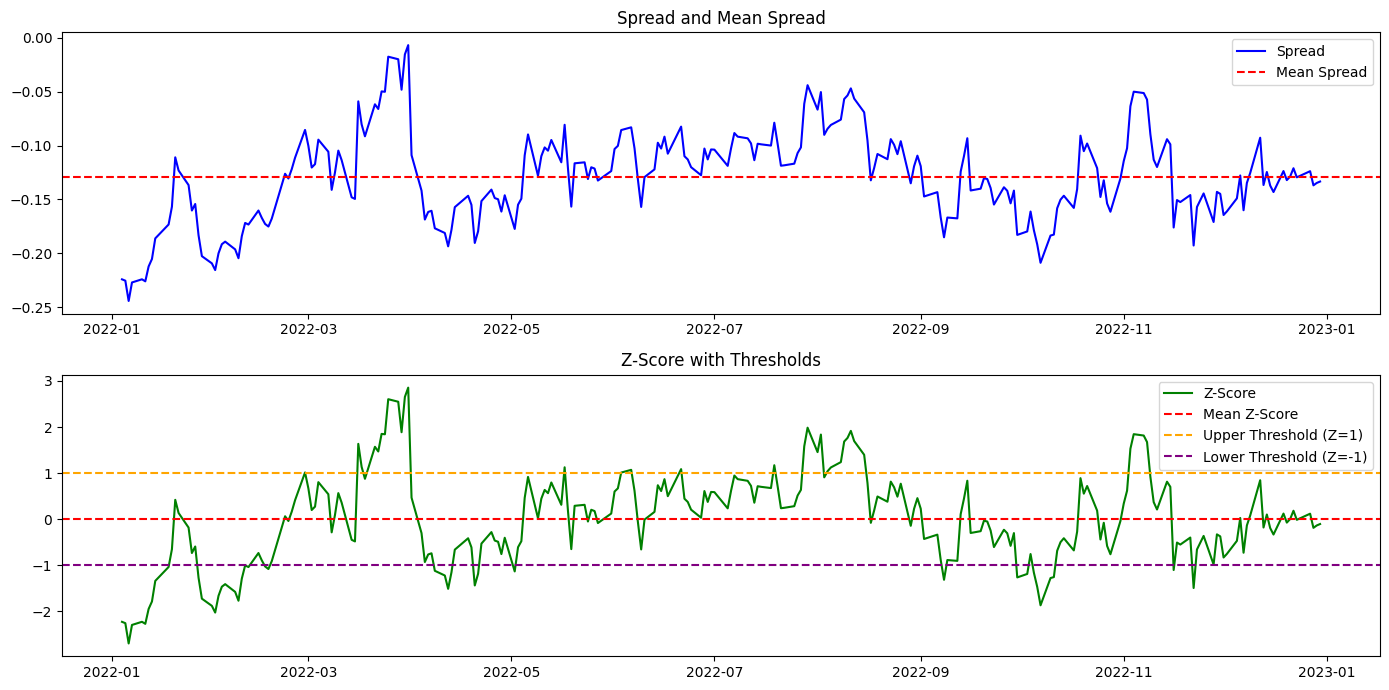

In [ ]:
plt.figure(figsize=(14, 7))

# График спреда
plt.subplot(2, 1, 1)
plt.plot(merged_data['Spread'], label='Spread', color='blue')
plt.axhline(mean_spread, color='red', linestyle='--', label='Mean Spread')
plt.title('Spread and Mean Spread')
plt.legend()

# График Z-Score
plt.subplot(2, 1, 2)
plt.plot(merged_data['Z_Score'], label='Z-Score', color='green')
plt.axhline(0, color='red', linestyle='--', label='Mean Z-Score')
plt.axhline(1, color='orange', linestyle='--', label='Upper Threshold (Z=1)')
plt.axhline(-1, color='purple', linestyle='--', label='Lower Threshold (Z=-1)')
plt.title('Z-Score with Thresholds')
plt.legend()

plt.tight_layout()
plt.show()

1. Начальные условия:
Имеется начальный капитал для торговли.
Выбираются две акции, которые исторически показывают корреляцию в их ценовых движениях.
2. Расчет спреда:
Спред рассчитывается как разность логарифмов цен закрытия этих двух акций. Это позволяет анализировать относительные изменения цен, а не абсолютные значения.
3. Вычисление Z-счета:
Для каждой новой торговой даты рассчитывается z-счет на основе скользящего среднего и скользящего стандартного отклонения спреда за определенный предшествующий период (например, 30 дней).
4. Торговые сигналы:
Покупка спреда: Если z-счет опускается ниже заданного порога (например, -1), это считается сигналом к покупке первой акции и продаже второй на эквивалентную сумму. Это основывается на предположении, что первая акция недооценена по сравнению со второй.
Продажа спреда: Если z-счет поднимается выше другого заданного порога (например, +1), это считается сигналом к продаже первой акции и покупке второй на эквивалентную сумму. Это основывается на предположении, что первая акция переоценена по сравнению со второй.
Выход из позиции: Когда z-счет возвращается к более нейтральному уровню (например, между -0.5 и +0.5), считается, что рынок скорректировался, и пора закрыть обе позиции.
5. Исполнение сделок:
Все сделки осуществляются по ценам закрытия дня, когда был сгенерирован сигнал.
При покупке спреда весь доступный капитал используется для покупки первой акции, а эквивалентная сумма используется для продажи второй акции.
При продаже спреда все акции первой компании продаются, и на вырученные средства покупаются акции второй компании.
При выходе из позиции закрываются все открытые позиции.
6. Учет торговых операций:
Ведется подробный учет наличных денег, количества акций каждой компании в портфеле и количества совершенных торговых операций.

In [14]:
# Парсинг выборки для подбора параметров входа-выхода

# Тестируемые тикеры акций
name_1, name_2 = 'CMA', 'NOW'

# Период для загрузки данных
start_date = "2022-01-02"
end_date = "2024-01-26"

# Загружаем дневные данные из Yahoo finance
ticker1 = yf.download(name_1, start=start_date, end=end_date)
ticker2 = yf.download(name_2, start=start_date, end=end_date)

open1 = yf.download(name_1, start=start_date, end=end_date)
open2 = yf.download(name_2, start=start_date, end=end_date)
data_open = pd.merge(ticker1['Open'], ticker2['Open'], left_index=True, right_index=True, how='inner')
data_open.columns = ['JBHT_Open', 'LOW_Open']

# Объединение данных по дате
z_test = pd.merge(ticker1['Close'], ticker2['Close'], left_index=True, right_index=True, how='inner')
z_test.columns = ['JBHT_Close', 'LOW_Close']

# Расчет логарифмической разности
z_test['Spread'] = np.log(z_test['LOW_Close']) - np.log(z_test['JBHT_Close'])
# Расчет z-score
z_test['Mean_spread'] = z_test['Spread'].rolling(window=30).mean()
z_test['Std_spread'] = z_test['Spread'].rolling(window=30).std()
z_test['Z-score'] = (z_test['Spread'] - z_test['Mean_spread']) / z_test['Std_spread']
z_test['JBHT_mean'] = z_test['JBHT_Close'].rolling(window=10).mean()
z_test['LOW_mean'] = z_test['LOW_Close'].rolling(window=10).mean()
# Перевод дат в цифровой формат
z_test['DateNumeric'] = z_test.index.map(pd.Timestamp.toordinal)

# Создание индексов в качестве признаков
X = z_test['DateNumeric'].values.reshape(-1, 1)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [19]:
# Внутредневные котировки
inday_1 = yf.download(tickers=name_1, period="60d", interval="30m")
inday_2 = yf.download(tickers=name_2, period="60d", interval="30m")

# Объединение данных по дате
z_test = pd.merge(inday_1['Close'], inday_2['Close'], left_index=True, right_index=True, how='inner')
z_test.columns = ['JBHT_Close', 'LOW_Close']

# Расчет логарифмической разности
z_test['Spread'] = np.log(z_test['LOW_Close']) - np.log(z_test['JBHT_Close'])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [15]:
# Начальные параметры
initial_capital = 100000    # Стартовый капитал
max_cash = initial_capital    # Максимально достигнутая сумма
cash = initial_capital    # Баланс кошелька
low_shares = 0    # Акции low
jbht_shares = 0    # Акции jbht
trade_count = 0   # Счетчик сделок
window = 29  # Окно для скользящего среднего и стандартного отклонения
roll_window = 23  # Окно для линейной регрессии
flag = True # Индикатор стоп-лосса

for index in range(window, len(z_test)-1):

    current_date = z_test.index[index]
    yerstaday_date = z_test.index[index-1]
    open_date = z_test.index[index+1]
    jbht_price = data_open.at[open_date, 'JBHT_Open']
    low_price = data_open.at[open_date, 'LOW_Open']
    # Расчет скользящего среднего и стандартного отклонения для спреда
    mean_spread = z_test.at[current_date, 'Mean_spread']
    std_spread = z_test.at[current_date, 'Std_spread']
    z_score = z_test.at[current_date, 'Z-score']

    # Расчет отклонения от линии регрессии котировок
    numeric_date = current_date.toordinal()
    # Модель для JBHT
    model_jbht = LinearRegression()
    model_jbht.fit(X[index-roll_window:index], z_test['JBHT_Close'][index-roll_window:index])
    predicted_jbht = model_jbht.predict([[numeric_date]])

    # Модель для LOW
    model_low = LinearRegression()
    model_low.fit(X[index-roll_window:index], z_test['LOW_Close'][index-roll_window:index])
    predicted_low = model_low.predict([[numeric_date]])

    # Расчет отклонения от линии регрессии
    deviation_jbht = z_test.at[current_date, 'JBHT_Close'] - predicted_jbht #) / predicted_low
    deviation_low = z_test.at[current_date, 'LOW_Close'] - predicted_low #) / predicted_jbht

    # Устанавливаем пороги на основе волатильности
    entry = 36 * std_spread
    sell = 1.5 * std_spread

    if flag == False:
        if index > loss_date + 5:
            flag = True

    # Торговые сигналы и сделки
    # Покупка спреда
    if flag:
        if z_score < -entry:
            # Длинная позиция по дорогой, короткая по дешевой
            if deviation_low < deviation_jbht:
                if low_shares == 0:
                    low_shares = cash / low_price
                    jbht_shares = -(cash / jbht_price)
                    cash -= low_shares * low_price
                    cash += -jbht_shares * jbht_price
                    trade_count += 1
                elif jbht_shares < 0:
                    delta = (-cash / jbht_price - jbht_shares) * jbht_price
                    low_shares -= delta / low_price
                    jbht_shares = -(cash / jbht_price)
                    trade_count += 1
                elif low_shares < 0:
                    cash += jbht_shares * jbht_price
                    cash += low_shares * low_price
                    low_shares = 0
                    jbht_shares = 0
                    low_shares = cash / low_price
                    jbht_shares = -(cash / jbht_price)
                    trade_count += 1
            # Короткая позиция по LOW, длинная по JBHT
            else: # if deviation_low > deviation_jbht #and deviation_jbht < 0 and deviation_low > 0:
                if low_shares == 0:
                    jbht_shares = cash / jbht_price
                    low_shares = -(cash / low_price)
                    cash -= jbht_shares * jbht_price
                    cash += -low_shares * low_price
                    trade_count += 1
                elif low_shares < 0:
                    delta = (-cash / low_price - low_shares) * low_price
                    jbht_shares -= delta / jbht_price
                    low_shares = -(cash / low_price)
                    trade_count += 1
                elif jbht_shares < 0:
                    cash += low_shares * low_price
                    cash += jbht_shares * jbht_price
                    low_shares = 0
                    jbht_shares = 0
                    jbht_shares = cash / jbht_price
                    low_shares = -(cash / low_price)
                    trade_count += 1

        # Покупка спреда
        elif z_score > entry:
            # Короткая позиция по LOW, длинная по JBHT
            if deviation_jbht < deviation_low:
                if low_shares == 0:
                    jbht_shares = cash / jbht_price
                    low_shares = -(cash / low_price)
                    cash -= jbht_shares * jbht_price
                    cash -= low_shares * low_price
                    trade_count += 1
                elif low_shares < 0:
                    delta = (-cash / low_price - low_shares) * low_price
                    jbht_shares -= delta / jbht_price
                    low_shares = -(cash / low_price)
                    trade_count += 1
                elif jbht_shares < 0:
                    cash += low_shares * low_price
                    cash += jbht_shares * jbht_price
                    low_shares = 0
                    jbht_shares = 0
                    jbht_shares = cash / jbht_price
                    low_shares = -(cash / low_price)
                    trade_count += 1
            # Длинная позиция по LOW, короткая по JBHT
            else: #if deviation_jbht > deviation_low and deviation_jbht > 0 and deviation_low < 0:
                if low_shares == 0:
                    low_shares = cash / low_price
                    jbht_shares = -(cash / jbht_price)
                    cash -= low_shares * low_price
                    cash += -jbht_shares * jbht_price
                    trade_count += 1
                elif jbht_shares < 0:
                    delta = (-cash / jbht_price - jbht_shares) * jbht_price
                    low_shares -= delta / low_price
                    jbht_shares = -(cash / jbht_price)
                    trade_count += 1
                elif low_shares < 0:
                    cash += jbht_shares * jbht_price
                    cash += low_shares * low_price
                    low_shares = 0
                    jbht_shares = 0
                    low_shares = cash / low_price
                    jbht_shares = -(cash / jbht_price)
                    trade_count += 1

        # Выход из позиции
        elif -sell < z_score < sell and low_shares != 0:
            cash += low_shares * low_price
            cash += jbht_shares * jbht_price
            low_shares = 0
            jbht_shares = 0
            trade_count += 1

    # Установка стоп-лосса
    # Расчет текущей стоимости позиций         
    value_low = low_shares * low_price
    value_jbht = jbht_shares * jbht_price
    total_value = cash + value_low + value_jbht

    if max_cash < cash:
        max_cash = cash
    stop_loss = 0.1 * max_cash

    # Расчет текущей позиции
    current_loss = max_cash - total_value

    # Проверка условий стоп-лосса
    if current_loss > stop_loss:
        # Закрытие всех позиций
        cash += low_shares * low_price
        cash += jbht_shares * jbht_price
        low_shares = 0
        jbht_shares = 0
        trade_count += 1
        max_cash = cash
        flag = False
        loss_date = index
        
    # Установка take-profit
    stop_profit = 0.1 * max_cash

    # Расчет текущего профита
    current_profit = total_value - max_cash

    if current_profit > stop_profit:
        # Закрытие всех позиций
        cash += low_shares * low_price
        cash += jbht_shares * jbht_price
        low_shares = 0
        jbht_shares = 0
        trade_count += 1

    # Если есть шорт позиции, списываем комиссию за день
    if jbht_shares < 0:
        daily_fee = -jbht_shares * jbht_price * 0.13 / 365
        cash -= daily_fee
    elif low_shares < 0:
        daily_fee = -low_shares * low_price * 0.13 / 365
        cash -= daily_fee

    # Обновление информации о портфеле
    z_test.at[current_date, 'Z_Score_Dynamic'] = z_score
    z_test.at[current_date, 'Cash'] = cash
    z_test.at[current_date, 'Max_Cash'] = max_cash
    z_test.at[current_date, 'JBHT_Shares'] = jbht_shares
    z_test.at[current_date, 'LOW_Shares'] = low_shares
    z_test.at[current_date, 'Trade_Count'] = trade_count

# Итоговое состояние портфеля
final_cash = cash
final_low_shares = low_shares
final_jbht_shares = jbht_shares
final_trade_count = trade_count

final_cash, final_low_shares, final_jbht_shares, final_trade_count

(241245.96437822195, 0, 0, 90)

In [119]:
z_test[-50:]

,JBHT_Close,LOW_Close,Spread,Mean_spread,Std_spread,Z-score,JBHT_mean,LOW_mean,DateNumeric,Z_Score_Dynamic,Cash,Max_Cash,JBHT_Shares,LOW_Shares,Trade_Count
Date,,,,,,,,,,,,,,,
2023-11-13,173.630005,193.839996,0.110106,0.077882,0.031515,1.022495,173.693001,193.354001,738837,1.022495,294735.835788,295577.543175,1693.854116,-1516.637817,163.0
2023-11-14,178.529999,202.240005,0.124698,0.079738,0.032596,1.379314,174.359001,194.521001,738838,1.379314,294626.483291,295577.543175,1693.854116,-1516.637817,163.0
2023-11-15,181.940002,204.850006,0.118601,0.081577,0.033195,1.115344,175.258002,195.877002,738839,1.115344,294516.325943,295577.543175,1693.854116,-1516.637817,163.0
2023-11-16,178.669998,202.279999,0.124112,0.083346,0.034018,1.198359,175.879001,196.673001,738840,1.198359,294406.514305,295577.543175,1693.854116,-1516.637817,163.0
2023-11-17,178.080002,203.699997,0.134415,0.085597,0.035108,1.390503,176.118001,197.549001,738841,1.390503,294301.657190,295577.543175,1613.995086,-1446.715058,164.0
2023-11-20,177.860001,204.440002,0.139278,0.088363,0.035979,1.415143,176.421001,198.570001,738844,1.415143,294199.881379,295577.543175,1613.995086,-1446.715058,164.0
2023-11-21,180.320007,198.059998,0.093837,0.089593,0.035495,0.119562,176.961002,198.918001,738845,0.119562,294097.605756,295577.543175,1613.995086,-1446.715058,164.0
2023-11-22,181.139999,198.479996,0.091418,0.091040,0.034615,0.010925,177.575002,199.298001,738846,0.010925,299603.594304,299603.594304,0.000000,0.000000,165.0
2023-11-24,183.050003,199.070007,0.083897,0.093149,0.032006,-0.289061,178.704002,200.156001,738848,-0.289061,299603.594304,299603.594304,0.000000,0.000000,165.0


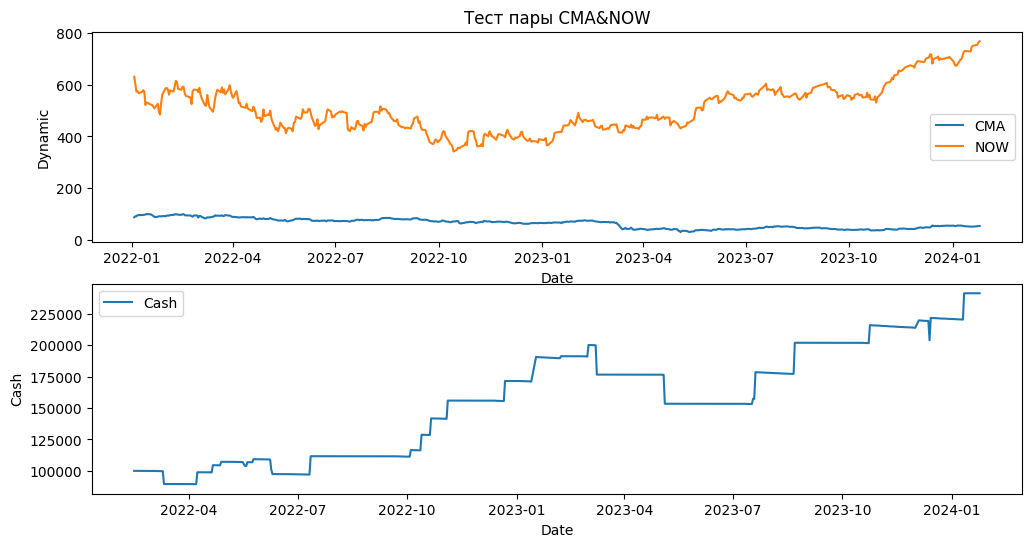

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(z_test.index, z_test['JBHT_Close'], label=f'{name_1}')
plt.plot(z_test.index, z_test['LOW_Close'], label=f'{name_2}')
plt.title(f'Тест пары {name_1}&{name_2}')
plt.xlabel('Date')
plt.ylabel('Dynamic')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(z_test.index, z_test['Cash'], label='Cash')
plt.xlabel('Date')
plt.ylabel('Cash')
plt.legend()

plt.show()

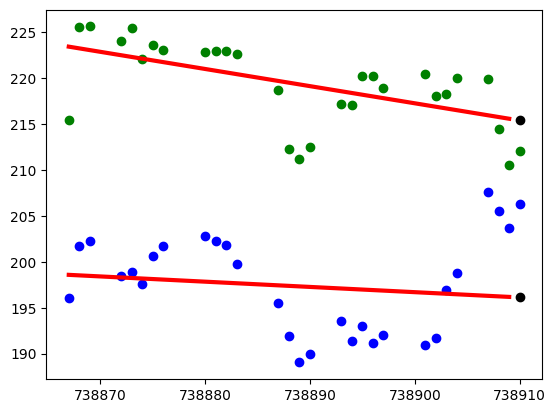

In [63]:
# Расчет отклонения от линии регрессии котировок
numeric_date = current_date.toordinal()
# Модель для JBHT
model_jbht = LinearRegression()
model_jbht.fit(X[index-window:index], z_test['JBHT_Close'][index-window:index])
predicted_jbht = model_jbht.predict(X[index-window:index])
p1 = model_jbht.predict([[numeric_date]])
# Модель для LOW
model_low = LinearRegression()
model_low.fit(X[index-window:index], z_test['LOW_Close'][index-window:index])
predicted_low = model_low.predict(X[index-window:index])
p2 = model_low.predict([[numeric_date]])
# Расчет отклонения от линии регрессии
deviation_jbht = jbht_price - predicted_jbht
deviation_low = low_price - predicted_low
#print(predicted_jbht, predicted_low, deviation_jbht, deviation_low)

# Визуализация результатов
plt.scatter(X[index-window:index+1], z_test['LOW_Close'][index-window:index+1], color='green')
plt.scatter(X[index-window:index+1], z_test['JBHT_Close'][index-window:index+1], color='blue')
plt.plot(X[index-window:index], predicted_low, color='red', linewidth=3)
plt.plot(X[index-window:index], predicted_jbht, color='red', linewidth=3)
plt.scatter(numeric_date, p1, color='black')
plt.scatter(numeric_date, p2, color='black')
plt.show()


In [55]:
import requests

def send_telegram_message(token, chat_id, message):
    url = f'https://api.telegram.org/bot{token}/sendMessage'
    payload = {
        'chat_id': chat_id,
        'text': message,
        'parse_mode': 'Markdown'
    }
    response = requests.post(url, json=payload)
    return response.json()

# Параметры для отправки сообщения
telegram_token = '6737079836:AAHQT4Bgz3Kh8LRA_kaQDJ76HJBzh9S_X8A'
chat_id = '264028245'
message = "Привет педик"

# Отправка сообщения
send_telegram_message(telegram_token, chat_id, message)

{'ok': True,
 'result': {'message_id': 3,
  'from': {'id': 6737079836,
   'is_bot': True,
   'first_name': 'MyResults',
   'username': 'resultsofmystrategy_bot'},
  'chat': {'id': 264028245,
   'first_name': 'Иван',
   'last_name': 'Сухов',
   'username': 'sukhov_is',
   'type': 'private'},
  'date': 1706970010,
  'text': 'Привет педик'}}

In [313]:
data['PredictedPrice'] = model.predict(data[['DateNumeric']])

# Расчет отклонения от линии регрессии
data['Deviation'] = data['Price'] - data['PredictedPrice']

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(data['Date'], data['Price'], color='blue', label='Actual Prices')
plt.plot(data['Date'], data['PredictedPrice'], color='red', label='Regression Line')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Deviation from Regression Line')
plt.legend()
plt.show()

DatetimeIndex(['2023-12-07', '2023-12-08', '2023-12-11', '2023-12-12',
               '2023-12-13', '2023-12-14', '2023-12-15', '2023-12-18',
               '2023-12-19', '2023-12-20', '2023-12-21', '2023-12-22',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
               '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-16', '2024-01-17', '2024-01-18'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [319]:
z_test[-5:]

,JBHT_Close,LOW_Close,Spread,Z_Score_Dynamic,Cash,Max_Cash,JBHT_Shares,LOW_Shares,Trade_Count,DateNumeric
Date,,,,,,,,,,
2024-01-12,151.250000,242.110001,0.470458,1.643559,186963.156407,187563.531617,1194.158185,-772.499150,136.0,738897
2024-01-16,153.759995,241.740005,0.452470,0.956929,186896.566790,187563.531617,1195.583832,-773.405941,137.0,738901
2024-01-17,153.369995,237.259995,0.436303,0.427509,186831.211235,187563.531617,1195.583832,-773.405941,137.0,738902
2024-01-18,160.339996,240.119995,0.403842,-0.562659,186765.067865,187563.531617,1195.583832,-773.405941,137.0,738903
2024-01-19,167.940002,244.600006,0.376017,-1.370636,198305.667145,198376.321725,-1181.233291,811.023372,138.0,738904


In [322]:
type(z_test['DateNumeric'][3])

C:\Users\Admin\AppData\Local\Temp\ipykernel_20140\347934458.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  type(z_test['DateNumeric'][3])


numpy.int64

In [1]:
# Парсинг выборки для бэктеста - продолжение той, на которой отрабатывалась стратегия

# Тестируемые тикеры акций
name_1, name_2 = 'PAYC', 'RMD'


# Период для загрузки данных
start_date = "2022-12-01"
end_date = "2023-12-22"

# Загружаем дневные данные из Yahoo finance
ticker1 = yf.download(name_1, start=start_date, end=end_date)
ticker2 = yf.download(name_2, start=start_date, end=end_date)

# Объединение данных по дате
z_test = pd.merge(ticker1['Close'], ticker2['Close'], left_index=True, right_index=True, how='inner')
z_test.columns = ['JBHT_Close', 'LOW_Close']

# Расчет логарифмической разности
z_test['Spread'] = np.log(z_test['LOW_Close']) - np.log(z_test['JBHT_Close'])

NameError: name 'yf' is not defined

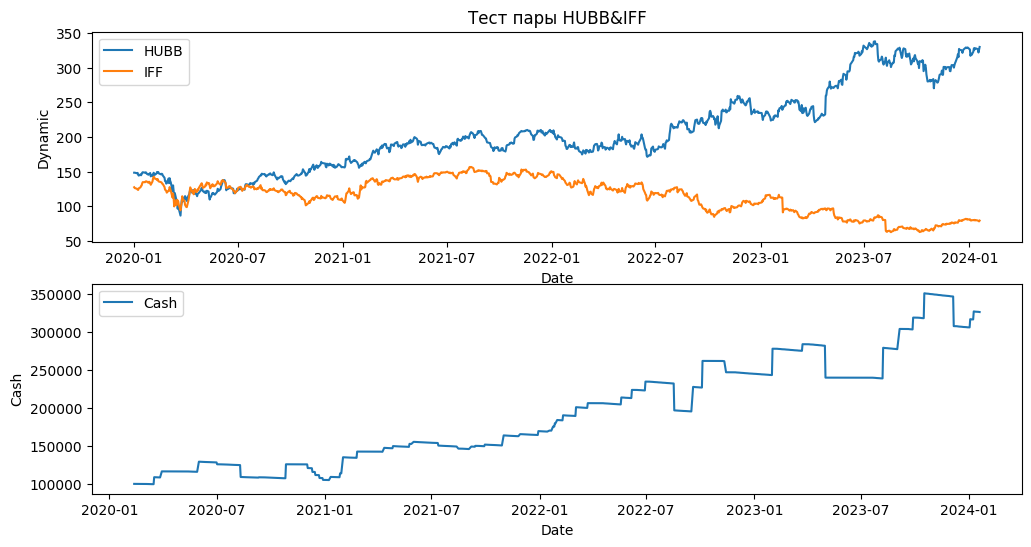

In [133]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(z_test.index, z_test['JBHT_Close'], label=name_1)
plt.plot(z_test.index, z_test['LOW_Close'], label=name_2)
plt.title(f'Тест пары {name_1}&{name_2}')
plt.xlabel('Date')
plt.ylabel('Dynamic')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(z_test.index, z_test['Cash'], label='Cash')
plt.xlabel('Date')
plt.ylabel('Cash')
plt.legend()

plt.show()

In [ ]:
# Начальные параметры
initial_capital = 100000    # Стартовый капитал
max_cash = initial_capital    # Максимально достигнутая сумма
cash = initial_capital    # Баланс кошелька
low_shares = 0    # Акции low
jbht_shares = 0    # Акции jbht
trade_count = 0   # Счетчик сделок
window = 28  # Окно для скользящего среднего и стандартного отклонения
roll_window = 23  # Окно для линейной регрессии
red_flag = True # Индикатор стоп-лосса

for index in range(window, len(z_test)):

    current_date = z_test.index[index]
    jbht_price = z_test.at[current_date, 'JBHT_Close']
    low_price = z_test.at[current_date, 'LOW_Close']
    # Расчет скользящего среднего и стандартного отклонения для спреда
    mean_spread = z_test['Spread'][index-window:index].mean()
    std_spread = z_test['Spread'][index-window:index].std()
    z_score = (z_test.at[current_date, 'Spread'] - mean_spread) / std_spread

    # Расчет отклонения от линии регрессии котировок
    numeric_date = current_date.toordinal()
    # Модель для JBHT
    model_jbht = LinearRegression()
    model_jbht.fit(X[index-roll_window:index], z_test['JBHT_Close'][index-roll_window:index])
    predicted_jbht = model_jbht.predict([[numeric_date]])

    # Модель для LOW
    model_low = LinearRegression()
    model_low.fit(X[index-roll_window:index], z_test['LOW_Close'][index-roll_window:index])
    predicted_low = model_low.predict([[numeric_date]])

    # Расчет отклонения от линии регрессии
    deviation_jbht = jbht_price - predicted_jbht
    deviation_low = low_price - predicted_low

    # Устанавливаем пороги на основе волатильности
    entry = 42 * std_spread
    exit = 1 * std_spread

    # Торговые сигналы и сделки
    # Покупка спреда
    if z_score < -entry:
        # Длинная позиция по дорогой, короткая по дешевой
        if deviation_jbht >= deviation_low:
            if low_shares == 0:
                low_shares = cash / low_price
                jbht_shares = -(cash / jbht_price)
                cash -= low_shares * low_price
                cash += -jbht_shares * jbht_price
                trade_count += 1
            elif jbht_shares < 0:
                delta = (-cash / jbht_price - jbht_shares) * jbht_price
                low_shares -= delta / low_price
                jbht_shares = -(cash / jbht_price)
                trade_count += 1
            elif low_shares < 0:
                cash += jbht_shares * jbht_price
                cash += low_shares * low_price
                low_shares = 0
                jbht_shares = 0
                low_shares = cash / low_price
                jbht_shares = -(cash / jbht_price)
                trade_count += 1
        # Короткая позиция по LOW, длинная по JBHT
        else: #elif red_flag == False and z_test.at[current_date, 'LOW_Close'] > z_test.at[current_date, 'JBHT_Close']:
            if low_shares == 0:
                jbht_shares = cash / jbht_price
                low_shares = -(cash / low_price)
                cash -= jbht_shares * jbht_price
                cash += -low_shares * low_price
                trade_count += 1
            elif low_shares < 0:
                delta = (-cash / low_price - low_shares) * low_price
                jbht_shares -= delta / jbht_price
                low_shares = -(cash / low_price)
                trade_count += 1
            elif jbht_shares < 0:
                cash += low_shares * low_price
                cash += jbht_shares * jbht_price
                low_shares = 0
                jbht_shares = 0
                jbht_shares = cash / jbht_price
                low_shares = -(cash / low_price)
                trade_count += 1

    # Покупка спреда
    elif z_score > entry:
        # Короткая позиция по LOW, длинная по JBHT
        if deviation_jbht < deviation_low:
            if low_shares == 0:
                jbht_shares = cash / jbht_price
                low_shares = -(cash / low_price)
                cash -= jbht_shares * jbht_price
                cash -= low_shares * low_price
                trade_count += 1
            elif low_shares < 0:
                delta = (-cash / low_price - low_shares) * low_price
                jbht_shares -= delta / jbht_price
                low_shares = -(cash / low_price)
                trade_count += 1
            elif jbht_shares < 0:
                cash += low_shares * low_price
                cash += jbht_shares * jbht_price
                low_shares = 0
                jbht_shares = 0
                jbht_shares = cash / jbht_price
                low_shares = -(cash / low_price)
                trade_count += 1
        # Длинная позиция по LOW, короткая по JBHT
        else: #elif red_flag == False and z_test.at[current_date, 'LOW_Close'] > z_test.at[current_date, 'JBHT_Close']:
            if low_shares == 0:
                low_shares = cash / low_price
                jbht_shares = -(cash / jbht_price)
                cash -= low_shares * low_price
                cash += -jbht_shares * jbht_price
                trade_count += 1
            elif jbht_shares < 0:
                delta = (-cash / jbht_price - jbht_shares) * jbht_price
                low_shares -= delta / low_price
                jbht_shares = -(cash / jbht_price)
                trade_count += 1
            elif low_shares < 0:
                cash += jbht_shares * jbht_price
                cash += low_shares * low_price
                low_shares = 0
                jbht_shares = 0
                low_shares = cash / low_price
                jbht_shares = -(cash / jbht_price)
                trade_count += 1

    # Выход из позиции
    elif -exit < z_score < exit:
        cash += low_shares * low_price
        cash += jbht_shares * jbht_price
        low_shares = 0
        jbht_shares = 0
        trade_count += 1

    # Установка стоп-лосса
    # Расчет текущей стоимости позиций         
    value_low = low_shares * low_price
    value_jbht = jbht_shares * jbht_price
    total_value = cash + value_low + value_jbht

    if max_cash < cash:
        max_cash = cash
    stop_loss = 0.15 * max_cash

    # Расчет текущей позиции
    current_loss = max_cash - total_value

    # Проверка условий стоп-лосса
    if current_loss > stop_loss:
        # Закрытие всех позиций
        cash += low_shares * low_price
        cash += jbht_shares * jbht_price
        low_shares = 0
        jbht_shares = 0
        trade_count += 1
        max_cash = 0
        #red_flag = not red_flag

    # Установка take-profit
    stop_profit = 0.17 * max_cash

    # Расчет текущего профита
    current_profit = total_value - max_cash

    if current_profit > stop_profit:
        # Закрытие всех позиций
        cash += low_shares * low_price
        cash += jbht_shares * jbht_price
        low_shares = 0
        jbht_shares = 0
        trade_count += 1

    # Если есть шорт позиции, списываем комиссию за день
    if jbht_shares < 0:
        daily_fee = -jbht_shares * jbht_price * 0.13 / 365
        cash -= daily_fee
    elif low_shares < 0:
        daily_fee = -low_shares * low_price * 0.13 / 365
        cash -= daily_fee

    # Обновление информации о портфеле
    z_test.at[current_date, 'Z_Score_Dynamic'] = z_score
    z_test.at[current_date, 'Cash'] = cash
    z_test.at[current_date, 'Max_Cash'] = max_cash
    z_test.at[current_date, 'JBHT_Shares'] = jbht_shares
    z_test.at[current_date, 'LOW_Shares'] = low_shares
    z_test.at[current_date, 'Trade_Count'] = trade_count

# Итоговое состояние портфеля
final_cash = cash
final_low_shares = low_shares
final_jbht_shares = jbht_shares
final_trade_count = trade_count

print(final_cash, final_low_shares, final_jbht_shares, final_trade_count)
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(z_test.index, z_test['JBHT_Close'], label=name_1)
plt.plot(z_test.index, z_test['LOW_Close'], label=name_2)
plt.title(f'Тест пары {name_1}&{name_2}')
plt.xlabel('Date')
plt.ylabel('Dynamic')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(z_test.index, z_test['Cash'], label='Cash')
plt.xlabel('Date')
plt.ylabel('Cash')
plt.legend()

plt.show()

In [6]:
# Тестируемые тикеры акций
name_1, name_2 = 'MAR', 'PSX'

# Период для загрузки данных
start_date = "2022-01-02"
end_date = "2024-01-22"

# Загружаем дневные данные из Yahoo finance
ticker1 = yf.download(name_1, start=start_date, end=end_date)
ticker2 = yf.download(name_2, start=start_date, end=end_date)

# Объединение данных по дате
z_test = pd.merge(ticker1['Close'], ticker2['Close'], left_index=True, right_index=True, how='inner')
z_test.columns = ['JBHT_Close', 'LOW_Close']

# Расчет логарифмической разности
z_test['Spread'] = np.log(z_test['LOW_Close']) - np.log(z_test['JBHT_Close'])

# Перевод дат в цифровой формат
z_test['DateNumeric'] = z_test.index.map(pd.Timestamp.toordinal)

# Создание индексов в качестве признаков
X = z_test['DateNumeric'].values.reshape(-1, 1)
# Начальные параметры
initial_capital = 100000    # Стартовый капитал
max_cash = initial_capital    # Максимально достигнутая сумма
cash = initial_capital    # Баланс кошелька
low_shares = 0    # Акции low
jbht_shares = 0    # Акции jbht
trade_count = 0   # Счетчик сделок
window = 28  # Окно для скользящего среднего и стандартного отклонения
red_flag = True

for index in range(window, len(z_test)):

    current_date = z_test.index[index]
    # Расчет скользящего среднего и стандартного отклонения для спреда
    mean_spread = z_test['Spread'][index-window:index].mean()
    std_spread = z_test['Spread'][index-window:index].std()
    z_score = (z_test.at[current_date, 'Spread'] - mean_spread) / std_spread

    # Устанавливаем пороги на основе волатильности
    entry = 35 * std_spread
    exit = 2.5 * std_spread

    # Торговые сигналы и сделки
    # Покупка спреда (длинная позиция по LOW, короткая по JBHT)
    if z_score < -entry:
        if red_flag == True:
            if low_shares == 0:
                low_shares = cash / z_test.at[current_date, 'LOW_Close']
                jbht_shares = -(cash / z_test.at[current_date, 'JBHT_Close'])
                cash -= low_shares * z_test.at[current_date, 'LOW_Close']
                cash += -jbht_shares * z_test.at[current_date, 'JBHT_Close']
                trade_count += 1
            elif jbht_shares < 0:
                delta = (-cash / z_test.at[current_date, 'JBHT_Close'] - jbht_shares) * z_test.at[current_date, 'JBHT_Close']
                low_shares -= delta / z_test.at[current_date, 'LOW_Close']
                jbht_shares = -(cash / z_test.at[current_date, 'JBHT_Close'])
                trade_count += 1
            elif low_shares < 0:
                cash += jbht_shares * z_test.at[current_date, 'JBHT_Close']
                cash += low_shares * z_test.at[current_date, 'LOW_Close']
                low_shares = 0
                jbht_shares = 0
                low_shares = cash / z_test.at[current_date, 'LOW_Close']
                jbht_shares = -(cash / z_test.at[current_date, 'JBHT_Close'])
                trade_count += 1
        else:
            if low_shares == 0:
                jbht_shares = cash / z_test.at[current_date, 'JBHT_Close']
                low_shares = -(cash / z_test.at[current_date, 'LOW_Close'])
                cash -= jbht_shares * z_test.at[current_date, 'JBHT_Close']
                cash -= low_shares * z_test.at[current_date, 'LOW_Close']
                trade_count += 1
            elif low_shares < 0:
                delta = (-cash / z_test.at[current_date, 'LOW_Close'] - low_shares) * z_test.at[current_date, 'LOW_Close']
                jbht_shares -= delta / z_test.at[current_date, 'JBHT_Close']
                low_shares = -(cash / z_test.at[current_date, 'LOW_Close'])
                trade_count += 1
            elif jbht_shares < 0:
                cash += low_shares * z_test.at[current_date, 'LOW_Close']
                cash += jbht_shares * z_test.at[current_date, 'JBHT_Close']
                low_shares = 0
                jbht_shares = 0
                jbht_shares = cash / z_test.at[current_date, 'JBHT_Close']
                low_shares = -(cash / z_test.at[current_date, 'LOW_Close'])
                trade_count += 1

    # Покупка спреда (короткая позиция по LOW, длинная по JBHT)
    elif z_score > entry:
        if red_flag == True:
            if low_shares == 0:
                jbht_shares = cash / z_test.at[current_date, 'JBHT_Close']
                low_shares = -(cash / z_test.at[current_date, 'LOW_Close'])
                cash -= jbht_shares * z_test.at[current_date, 'JBHT_Close']
                cash -= low_shares * z_test.at[current_date, 'LOW_Close']
                trade_count += 1
            elif low_shares < 0:
                delta = (-cash / z_test.at[current_date, 'LOW_Close'] - low_shares) * z_test.at[current_date, 'LOW_Close']
                jbht_shares -= delta / z_test.at[current_date, 'JBHT_Close']
                low_shares = -(cash / z_test.at[current_date, 'LOW_Close'])
                trade_count += 1
            elif jbht_shares < 0:
                cash += low_shares * z_test.at[current_date, 'LOW_Close']
                cash += jbht_shares * z_test.at[current_date, 'JBHT_Close']
                low_shares = 0
                jbht_shares = 0
                jbht_shares = cash / z_test.at[current_date, 'JBHT_Close']
                low_shares = -(cash / z_test.at[current_date, 'LOW_Close'])
                trade_count += 1
        else:
            if low_shares == 0:
                low_shares = cash / z_test.at[current_date, 'LOW_Close']
                jbht_shares = -(cash / z_test.at[current_date, 'JBHT_Close'])
                cash -= low_shares * z_test.at[current_date, 'LOW_Close']
                cash += -jbht_shares * z_test.at[current_date, 'JBHT_Close']
                trade_count += 1
            elif jbht_shares < 0:
                delta = (-cash / z_test.at[current_date, 'JBHT_Close'] - jbht_shares) * z_test.at[current_date, 'JBHT_Close']
                low_shares -= delta / z_test.at[current_date, 'LOW_Close']
                jbht_shares = -(cash / z_test.at[current_date, 'JBHT_Close'])
                trade_count += 1
            elif low_shares < 0:
                cash += jbht_shares * z_test.at[current_date, 'JBHT_Close']
                cash += low_shares * z_test.at[current_date, 'LOW_Close']
                low_shares = 0
                jbht_shares = 0
                low_shares = cash / z_test.at[current_date, 'LOW_Close']
                jbht_shares = -(cash / z_test.at[current_date, 'JBHT_Close'])
                trade_count += 1

    # Выход из позиции
    elif -exit < z_score < exit:
        cash += low_shares * z_test.at[current_date, 'LOW_Close']
        cash += jbht_shares * z_test.at[current_date, 'JBHT_Close']
        low_shares = 0
        jbht_shares = 0
        trade_count += 1

    # Выравнивание позиций, если нет сигналов
    #else:
        #if low_shares < 0:
            #delta = (-cash / z_test.at[current_date, 'LOW_Close'] - low_shares) * z_test.at[current_date, 'LOW_Close']
            #jbht_shares -= delta / z_test.at[current_date, 'JBHT_Close']
            #low_shares = -(cash / z_test.at[current_date, 'LOW_Close'])
            #trade_count += 1
        #elif jbht_shares < 0:
            #delta = (-cash / z_test.at[current_date, 'JBHT_Close'] - jbht_shares) * z_test.at[current_date, 'JBHT_Close']
            #low_shares -= delta / z_test.at[current_date, 'LOW_Close']
            #jbht_shares = -(cash / z_test.at[current_date, 'JBHT_Close'])
            #trade_count += 1

    # Установка стоп-лосса
    # Расчет текущей стоимости позиций         
    value_low = low_shares * z_test.at[current_date, 'LOW_Close']
    value_jbht = jbht_shares * z_test.at[current_date, 'JBHT_Close']
    total_value = cash + value_low + value_jbht

    if max_cash < cash:
        max_cash = cash
    stop_loss = 0.15 * max_cash

    # Расчет текущего убытка
    current_loss = max_cash - total_value

    # Проверка условий стоп-лосса
    if current_loss >= stop_loss:
        # Закрытие всех позиций
        cash += low_shares * z_test.at[current_date, 'LOW_Close']
        cash += jbht_shares * z_test.at[current_date, 'JBHT_Close']
        low_shares = 0
        jbht_shares = 0
        trade_count += 1
        max_cash = 0
        red_flag = not red_flag

    # Установка take-profit
    stop_profit = 0.15 * cash

    # Расчет текущего убытка
    current_profit = total_value - max_cash
    if current_profit >= stop_profit:
        # Закрытие всех позиций
        cash += low_shares * z_test.at[current_date, 'LOW_Close']
        cash += jbht_shares * z_test.at[current_date, 'JBHT_Close']
        low_shares = 0
        jbht_shares = 0
        trade_count += 1
        max_cash = 0

    # Если есть шорт позиции, списываем комиссию за день
    if jbht_shares < 0:
        daily_fee = -jbht_shares * z_test.at[current_date, 'JBHT_Close'] * 0.13 / 365
        cash -= daily_fee
    elif low_shares < 0:
        daily_fee = -low_shares * z_test.at[current_date, 'LOW_Close'] * 0.13 / 365
        cash -= daily_fee

    # Обновление информации о портфеле
    z_test.at[current_date, 'Z_Score_Dynamic'] = z_score
    z_test.at[current_date, 'Cash'] = cash
    z_test.at[current_date, 'Max_Cash'] = max_cash
    z_test.at[current_date, 'JBHT_Shares'] = jbht_shares
    z_test.at[current_date, 'LOW_Shares'] = low_shares
    z_test.at[current_date, 'Trade_Count'] = trade_count

# Итоговое состояние портфеля
final_cash = cash
final_low_shares = low_shares
final_jbht_shares = jbht_shares
final_trade_count = trade_count

final_cash, final_low_shares, final_jbht_shares, final_trade_count

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


(167092.85546914442, 1217.12902628165, -715.3352612942249, 178)

# Стратегия улучшенная(?) моделью ARIMA. Обучаем модель на спредах пары акций. Используем прогноз модели для расчета среднего z-счета плавающего окна, смещенного в будущее на несколько дней. Принимаем решение о покупке/продаже спреда на основе этого среднего стандартного отклонения.

In [ ]:
# Парсинг бэктестовой выборки - продолжение той, на которой отрабатывалась стратегия

# Тестируемые тикеры акций
name_1 = 'JBHT'
name_2 = 'LOW'

# Период для загрузки данных
start_date = "2022-01-02"
end_date = "2022-12-31"

# Загружаем дневные данные из Yahoo finance
ticker1 = yf.download(name_1, start=start_date, end=end_date)
ticker2 = yf.download(name_2, start=start_date, end=end_date)

# Объединение данных по дате
merged_data = pd.merge(ticker1['Close'], ticker2['Close'], left_index=True, right_index=True, how='inner')
merged_data.columns = ['JBHT_Close', 'LOW_Close']

# Расчет логарифмической разности
merged_data['Spread'] = np.log(merged_data['LOW_Close']) - np.log(merged_data['JBHT_Close'])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
adf_test(merged_data['Spread'])

Test Statistic                  -4.487433
p-value                          0.000207
#Lags Used                       0.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64 



In [ ]:
# Разделение данных на train и test
# Определение даты начала тестового периода (последний месяц данных)
test_start_date = merged_data.index.max() - timedelta(days=5)

# Разделение на обучающую и тестовую выборки
train = merged_data[merged_data.index < test_start_date]
test = merged_data[merged_data.index >= test_start_date]


In [ ]:
# Обучение модели ARIMA - Авторегрессионная интегрированная модель скользящего среднего

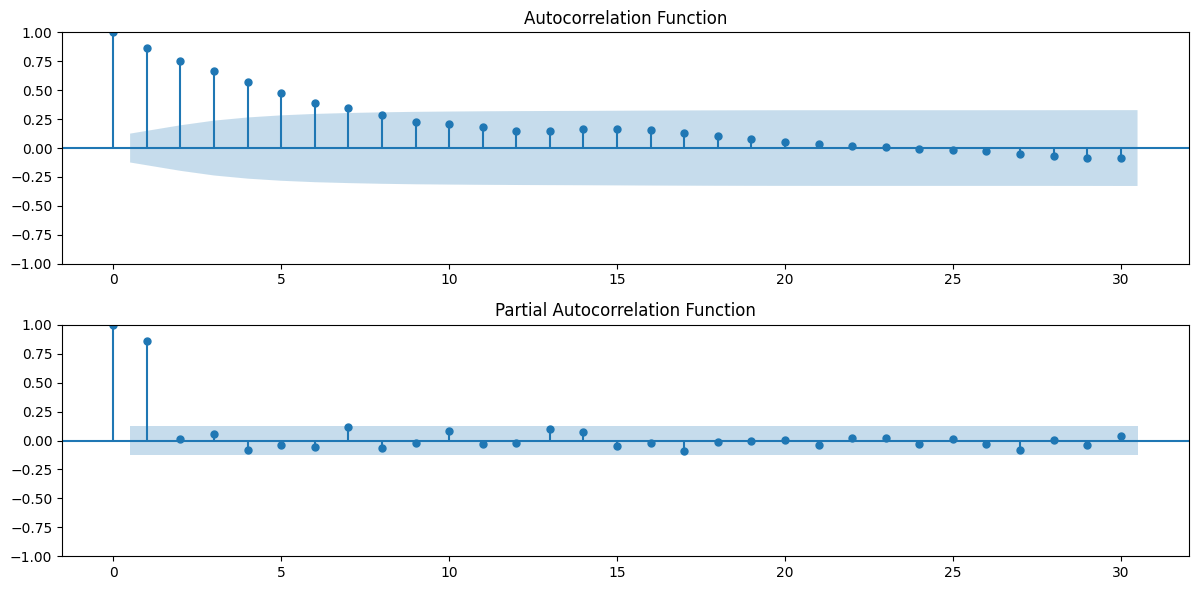

In [ ]:
# Графики  ACF и PACF для подбора параметров p и q модели.

plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(train['Spread'], ax=plt.gca(), lags=30)
plt.title('Autocorrelation Function')

plt.subplot(212)
plot_pacf(train['Spread'], ax=plt.gca(), lags=30)
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

In [ ]:
# ACF (Autocorrelation Function): Показывает корреляцию между временным рядом и его запаздывающими значениями.
# Для параметра q в ARIMA, мы ищем, где график ACF затухает или обрывается.

In [ ]:
# PACF (Partial Autocorrelation Function): Показывает частичную корреляцию временного ряда с его собственными запаздывающими значениями, исключая влияние промежуточных запаздываний.
# Для параметра p, мы ищем, где график PACF затухает или обрывается.

In [ ]:
#pip install pmdarima

In [ ]:
# Подбор параметров ARIMA c помощью функции auto_arima

# Использование auto_arima для автоматического определения p, d, q
auto_model = auto_arima(train['Spread'], start_p=1, start_q=1,
                        test='adf',       # Использование ADF теста для определения 'd'
                        max_p=5, max_q=5, # Максимальные значения p и q для проверки
                        m=1,              # Периодичность данных для сезонности (если есть)
                        d=None,           # Позволяя auto_arima определить 'd'
                        seasonal=False,   # Без учета сезонности
                        start_P=0,
                        D= 0,
                        trace=True,       # Вывод информации о процессе подбора
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=False)    # Использование пошагового алгоритма для оптимизации

# Вывод наилучшей найденной модели
print(auto_model.summary())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-281.322, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-571.075, Time=0.36 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-738.953, Time=0.84 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-873.840, Time=0.86 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=-917.895, Time=1.23 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=-988.065, Time=1.64 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1183.890, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1183.434, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1184.715, Time=0.22 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-1183.803, Time=0.46 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-1182.123, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-1183.125, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1181.292, Time=0.33 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-1184.472, Time=0.24 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-1182.552, Time=0.31 sec
 

In [ ]:
# Предупреждения
warnings.filterwarnings("ignore")

# Параметры модели
p, d, q = 3, 1, 0

# ARIMA
model = ARIMA(train['Spread'], order=(p, d, q))
model_fit = model.fit()

# Отчет
model_summary = model_fit.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Spread   No. Observations:                  247
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 596.105
Date:                Fri, 22 Dec 2023   AIC                          -1184.210
Time:                        22:28:11   BIC                          -1170.188
Sample:                             0   HQIC                         -1178.564
                                - 247                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0859      0.063     -1.362      0.173      -0.209       0.038
ar.L2         -0.1269      0.060     -2.116      0.034      -0.244      -0.009
ar.L3          0.0058      0.068      0.086      0.931      -0.127       0.139
sigma2         0.0005   3.08e-05     14.915      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                57.41
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.38
Prob(H) (two-sided):                  0.71   Kurtosis:                         5.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# const: Постоянный компонент модели составляет примерно -25.85.
# ar.L1: Коэффициент авторегрессии (AR) близок к 0.91, что указывает на значительную авторегрессию в данных.
# ma.L1: Коэффициент скользящего среднего (MA) составляет -0.026, но его p-значение указывает на то, что он статистически не значим.

In [ ]:
# Log Likelihood: Логарифмическая функция правдоподобия составляет -709.653, что помогает в оценке подгонки модели.
# AIC и BIC: Критерии информации Акаике (1427.305) и Байеса (1441.391) используются для сравнения моделей; меньшие значения предпочтительнее.
# Ljung-Box Test: P-значение теста Льюнга-Бокса указывает на адекватность модели.

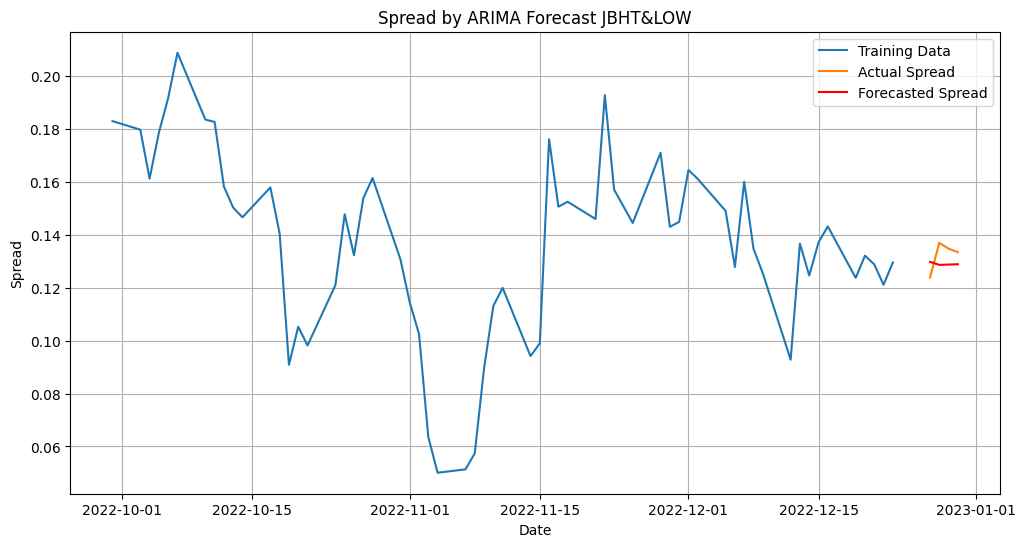

In [ ]:
# Прогнозирование
forecast = model_fit.forecast(steps=len(test))

# Визуализация реальных и прогнозируемых значений
plt.figure(figsize=(12, 6))
plt.plot(train.index[-60:], train['Spread'][-60:], label='Training Data')
plt.plot(test.index, test['Spread'], label='Actual Spread')
plt.plot(test.index, forecast, label='Forecasted Spread', color='red')
plt.title(f'Spread by ARIMA Forecast {name_1}&{name_2}')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Парсинг выборки для бэктеста - продолжение той, на которой отрабатывалась стратегия

# Тестируемые тикеры акций
name_1 = 'JBHT'
name_2 = 'LOW'

# Период для загрузки данных
start_date = "2022-12-01"
end_date = "2023-12-22"

# Загружаем дневные данные из Yahoo finance
ticker1 = yf.download(name_1, start=start_date, end=end_date)
ticker2 = yf.download(name_2, start=start_date, end=end_date)

# Объединение данных по дате
z_test = pd.merge(ticker1['Close'], ticker2['Close'], left_index=True, right_index=True, how='inner')
z_test.columns = ['JBHT_Close', 'LOW_Close']

# Расчет логарифмической разности
z_test['Spread'] = np.log(z_test['LOW_Close']) - np.log(z_test['JBHT_Close'])

NameError: name 'yf' is not defined

In [ ]:
# Начальные параметры
initial_capital = 100000    # Стартовый капитал
max_cash = initial_capital    # Максимально достигнутая сумма
cash = initial_capital    # Баланс кошелька
low_shares = 0    # Акции low
jbht_shares = 0    # Акции jbht
trade_count = 0   # Счетчик сделок
window = 28  # Окно для скользящего среднего и стандартного отклонения
warnings.filterwarnings("ignore")
for index in range(window, len(z_test)):
    current_date = z_test.index[index]
    # ARIMA

    model = ARIMA(z_test['Spread'][index-window:index], order=(3, 0, 1))
    model_fit = model.fit()
    forecast_values = model_fit.forecast(steps=3)  # Получаем прогнозируемые значения

    # Объединяем исторические данные и прогнозы в один временной ряд
    full_series = z_test['Spread'][index-window:index].append(pd.Series(forecast_values))

    # Расчет скользящего среднего и стандартного отклонения для объединенного временного ряда
    mean_spread = full_series.mean()
    std_spread = full_series.std()
    z_score = (z_test.at[current_date, 'Spread'] - mean_spread) / std_spread

    # Устанавливаем пороги на основе волатильности
    entry = 35 * std_spread
    exit = 2.5 * std_spread

    # Расчет текущей стоимости позиций
    value_low = low_shares * z_test.at[current_date, 'LOW_Close']
    value_jbht = jbht_shares * z_test.at[current_date, 'JBHT_Close']
    total_value = value_low + value_jbht

    # Торговые сигналы и сделки
    # Покупка спреда (длинная позиция по LOW, короткая по JBHT)
    if z_score < -entry and cash >= 0:
        if low_shares == 0 and jbht_shares == 0:
            low_shares = cash / z_test.at[current_date, 'LOW_Close']
            jbht_shares = -(cash / z_test.at[current_date, 'JBHT_Close'])
            cash -= low_shares * z_test.at[current_date, 'LOW_Close']
            cash += abs(jbht_shares) * z_test.at[current_date, 'JBHT_Close']
            trade_count += 1
        elif low_shares > 0 and jbht_shares < 0:
            delta = (-(cash / z_test.at[current_date, 'JBHT_Close']) - jbht_shares) * z_test.at[current_date, 'JBHT_Close']
            low_shares -= delta / z_test.at[current_date, 'LOW_Close']
            jbht_shares = -(cash / z_test.at[current_date, 'JBHT_Close'])
            trade_count += 1
        elif low_shares < 0 and jbht_shares > 0:
            cash += jbht_shares * z_test.at[current_date, 'JBHT_Close']
            cash -= abs(low_shares) * z_test.at[current_date, 'LOW_Close']
            low_shares = 0
            jbht_shares = 0
            low_shares = cash / z_test.at[current_date, 'LOW_Close']
            jbht_shares = -(cash / z_test.at[current_date, 'JBHT_Close'])
            cash -= low_shares * z_test.at[current_date, 'LOW_Close']
            cash += abs(jbht_shares) * z_test.at[current_date, 'JBHT_Close']
            trade_count += 1

    # Покупка спреда (короткая позиция по LOW, длинная по JBHT)
    elif z_score > entry  and cash >= 0:
        if low_shares == 0 and jbht_shares == 0:
            jbht_shares = cash / z_test.at[current_date, 'JBHT_Close']
            low_shares = -(cash / z_test.at[current_date, 'LOW_Close'])
            cash -= jbht_shares * z_test.at[current_date, 'JBHT_Close']
            cash += abs(low_shares) * z_test.at[current_date, 'LOW_Close']
            trade_count += 1
        elif low_shares < 0 and jbht_shares > 0:
            delta = (-(cash / z_test.at[current_date, 'LOW_Close']) - low_shares) * z_test.at[current_date, 'LOW_Close']
            jbht_shares -= delta / z_test.at[current_date, 'JBHT_Close']
            low_shares = -(cash / z_test.at[current_date, 'LOW_Close'])
            trade_count += 1
        elif low_shares > 0 and jbht_shares < 0:
            cash += low_shares * z_test.at[current_date, 'LOW_Close']
            cash -= abs(jbht_shares) * z_test.at[current_date, 'JBHT_Close']
            low_shares = 0
            jbht_shares = 0
            jbht_shares = cash / z_test.at[current_date, 'JBHT_Close']
            low_shares = -(cash / z_test.at[current_date, 'LOW_Close'])
            cash -= jbht_shares * z_test.at[current_date, 'JBHT_Close']
            cash += abs(low_shares) * z_test.at[current_date, 'LOW_Close']
            trade_count += 1

    # Выход из позиции
    elif -exit < z_score < exit:
        if low_shares > 0 and jbht_shares < 0:
            cash += low_shares * z_test.at[current_date, 'LOW_Close']
            cash -= abs(jbht_shares) * z_test.at[current_date, 'JBHT_Close']
            low_shares = 0
            jbht_shares = 0
            trade_count += 1
        elif low_shares < 0 and jbht_shares > 0:
            cash += jbht_shares * z_test.at[current_date, 'JBHT_Close']
            cash -= abs(low_shares) * z_test.at[current_date, 'LOW_Close']
            low_shares = 0
            jbht_shares = 0
            trade_count += 1

    # Установка стоп-лосса
    if max_cash < cash:
        max_cash = cash
    stop_loss_limit = 0.02 * max_cash

    # Расчет текущего убытка
    current_loss = max_cash - cash

    # Проверка условий стоп-лосса
    if current_loss >= stop_loss_limit:
        # Закрытие всех позиций
        if low_shares > 0 and jbht_shares < 0:
            cash += low_shares * z_test.at[current_date, 'LOW_Close']
            cash -= abs(jbht_shares) * z_test.at[current_date, 'JBHT_Close']
            low_shares = 0
            jbht_shares = 0
            trade_count += 1
        elif low_shares < 0 and jbht_shares > 0:
            cash += jbht_shares * z_test.at[current_date, 'JBHT_Close']
            cash -= abs(low_shares) * z_test.at[current_date, 'LOW_Close']
            low_shares = 0
            jbht_shares = 0
            trade_count += 1
        max_cash = 0

    # Если есть шорт позиции, списываем комиссию за день
    if jbht_shares < 0:
        daily_fee = abs(jbht_shares) * z_test.at[current_date, 'JBHT_Close'] * 0.13 / 365
        cash -= daily_fee
    elif low_shares < 0:
        daily_fee = abs(low_shares) * z_test.at[current_date, 'LOW_Close'] * 0.13 / 365
        cash -= daily_fee

    # Обновление информации о портфеле
    z_test.at[current_date, 'Z_Score_Dynamic'] = z_score
    z_test.at[current_date, 'Cash'] = cash
    z_test.at[current_date, 'Max_Cash'] = max_cash
    z_test.at[current_date, 'JBHT_Shares'] = jbht_shares
    z_test.at[current_date, 'LOW_Shares'] = low_shares
    z_test.at[current_date, 'Trade_Count'] = trade_count

# Итоговое состояние портфеля
final_cash = cash
final_low_shares = low_shares
final_jbht_shares = jbht_shares
final_trade_count = trade_count

final_cash, final_low_shares, final_jbht_shares, final_trade_count

(189904.36601166028, 0, 0, 101)

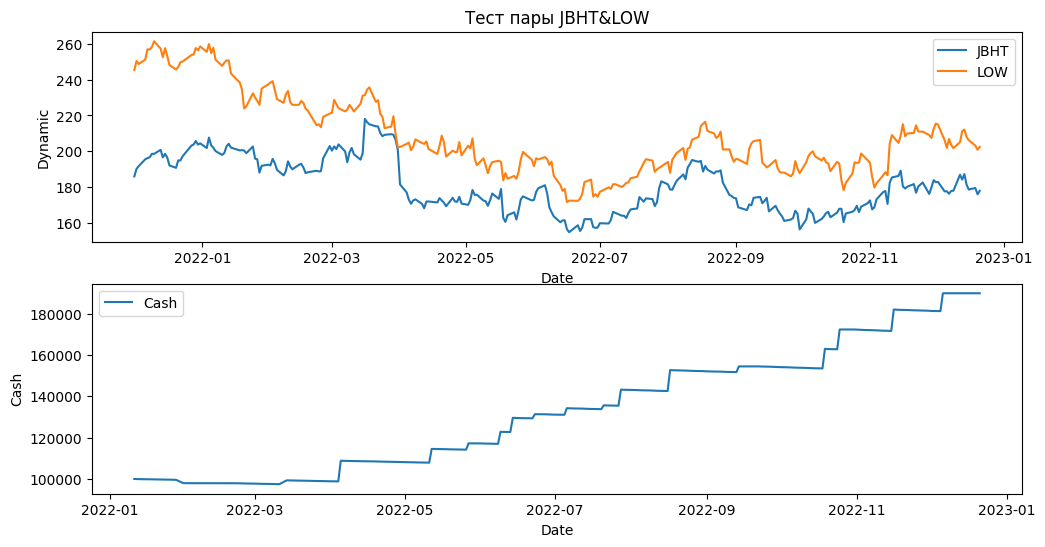

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(z_test.index, z_test['JBHT_Close'], label=name_1)
plt.plot(z_test.index, z_test['LOW_Close'], label=name_2)
plt.title(f'Тест пары {name_1}&{name_2}')
plt.xlabel('Date')
plt.ylabel('Dynamic')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(z_test.index, z_test['Cash'], label='Cash')
plt.xlabel('Date')
plt.ylabel('Cash')
plt.legend()

plt.show()

In [11]:
pip install pip3

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pip3 (from versions: none)
ERROR: No matching distribution found for pip3


In [14]:
pip install conda

Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following yanked versions: 3.0.6, 3.5.0, 3.7.0, 3.17.0, 4.0.0, 4.0.1, 4.0.2, 4.0.3, 4.0.4, 4.0.5, 4.0.7, 4.0.8, 4.0.9, 4.1.2, 4.1.6, 4.2.6, 4.2.7, 4.3.13, 4.3.16
ERROR: Could not find a version that satisfies the requirement conda (from versions: none)
ERROR: No matching distribution found for conda
